In [717]:
%load_ext autoreload
%autoreload 2
import glob
#from cleaning_data import cleaning_match
import pandas as pd
from feature_extraction import extracting_total_outs_per_batsman, runs_per_season, all_features, player_info, extracting_age
from cleaning_data import concating_dataframes, cleaning_replacing
from train_test import train_and_test
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None) 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [218]:
all_df = concating_dataframes('../../capstone_project/ipl_csv/Data/trial/')

In [2640]:
train, test = train_and_test(2016, 2016)

/Users/panesar47/galvanize/Performance-predictor-IPL/src/feature_extraction.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['ball']=1
/Users/panesar47/galvanize/Performance-predictor-IPL/src/train_test.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['ball']=1


In [2641]:
reg_X = train.copy()

In [1989]:
### drop all duplicates like brandon mccullum and ganguly!!

In [1990]:
## counting seasonns for player and keeping only 5 or more

In [2030]:
reg_X = reg_X[reg_X.season!=2008]

In [2642]:
reg_X = reg_X.drop_duplicates()

reg_X = reg_X.sort_values(['player_id', 'season'])

reg_X = reg_X[reg_X.batsman_striker != 'BB McCullum']

from collections import Counter
cnt = Counter()

In [2032]:
# settign up counter to count seasons for each [erson]

In [2643]:
for player in reg_X.batsman_striker:
    cnt[player] += 1

    
    

a = pd.DataFrame.from_dict(cnt, orient = 'index').reset_index()

a = a.sort_values(0, ascending=False).reset_index()

a = a.rename(columns={'level_0':'player_id', 'index':'batsman_striker', 0:'seasons_played'})

a.drop('player_id',axis= 1 ,inplace= True)

reg_X = pd.merge(reg_X, a, on= 'batsman_striker', how='outer')
#reg_X['total_seasons_played']= reg_X['seasons_played']-1








In [2644]:
reg_X['total_seasons_played']= reg_X['seasons_played']-1


reg_X.drop(columns='seasons_played', axis=1, inplace=True)




In [2645]:
## keeps only batsman player 2016 and more that 5

In [2646]:
reg_X = reg_X[reg_X.total_seasons_played >= 5]

In [2037]:
## making sure to keep batsman just from 2016

In [2038]:
batin_y = reg_X[reg_X.season ==2017]

batin_y = batin_y[['batsman_striker']]

reg_X = reg_X.merge(batin_y, on='batsman_striker')

In [2039]:
reg_y = reg_X[reg_X.season == 2017]

reg_X = reg_X[reg_X.season != 2017]

In [2040]:
#calculating runs per match

In [2041]:
average_upto_2015= (reg_X.groupby(['batsman_striker', 'season','total_seasons_played']).sum()).reset_index()

In [2042]:
average_upto_2015['runs_per_match_avg'] = average_upto_2015['runs_scored']/average_upto_2015['matches']

In [2043]:
average_upto_2015.head()

,batsman_striker,season,total_seasons_played,player_id,ball,matches,runs_scored,total_outs,highest_score,Average,strike_rate,Average_1st_innings,strike_rate_1st_innings,Average_2nd_innings,strike_rate_2nd_innings,toss_win_count,30+,50+,75+,number_of_zeros,Australia,Bangladesh,England,India,Netherlands,New Zealand,Pakistan,South Africa,Sri Lanka,West Indies,Zimbabwea,Right_hand_bat,age,runs_per_match_avg
0,A Mishra,2009,8,8,20,5,26,3.0,13,8.67,130.00,0.67,25.00,0.00,200.00,3.0,0.0,0.0,0.0,2.0,0,0,0,1,0,0,0,0,0,0,0,1,27,5.200000
1,A Mishra,2010,8,8,54,7,39,4.0,12,9.75,72.22,0.00,106.67,5.75,58.97,3.0,0.0,0.0,0.0,1.0,0,0,0,1,0,0,0,0,0,0,0,1,28,5.571429
2,A Mishra,2011,8,8,52,9,68,4.0,25,17.00,130.77,6.67,166.67,48.00,120.00,4.0,0.0,0.0,0.0,3.0,0,0,0,1,0,0,0,0,0,0,0,1,29,7.555556
3,A Mishra,2012,8,8,21,5,16,3.0,8,5.33,76.19,2.67,50.00,0.00,160.00,3.0,0.0,0.0,0.0,1.0,0,0,0,1,0,0,0,0,0,0,0,1,30,3.200000
4,A Mishra,2013,8,8,103,6,89,6.0,30,14.83,86.41,16.50,82.50,11.50,100.00,3.0,1.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,1,31,14.833333


In [2044]:
# calculating averge runs per match for whole career (runspermatchavg / seasons)

In [2045]:
average_upto_2015= (average_upto_2015.groupby(['batsman_striker','total_seasons_played']).sum()).reset_index()

In [2046]:
average_upto_2015['career_runs_match']= average_upto_2015['runs_per_match_avg']/ average_upto_2015['total_seasons_played']

In [2047]:
average_upto_2015 = average_upto_2015.rename(columns={'total_seasons_played':'career_age'})

In [2048]:
average_upto_2015.head()

,batsman_striker,career_age,season,player_id,ball,matches,runs_scored,total_outs,highest_score,Average,strike_rate,Average_1st_innings,strike_rate_1st_innings,Average_2nd_innings,strike_rate_2nd_innings,toss_win_count,30+,50+,75+,number_of_zeros,Australia,Bangladesh,England,India,Netherlands,New Zealand,Pakistan,South Africa,Sri Lanka,West Indies,Zimbabwea,Right_hand_bat,age,runs_per_match_avg,career_runs_match
0,A Mishra,8,16100,64,284,40,254,25.0,99,65.58,642.84,32.51,524.17,71.25,801.47,20.0,1.0,0.0,0.0,8.0,0,0,0,8,0,0,0,0,0,0,0,8,244,42.360317,5.295040
1,AB Dinda,6,12069,132,38,13,17,8.0,12,11.50,219.26,6.00,165.00,4.50,121.82,6.0,0.0,0.0,0.0,6.0,0,0,0,6,0,0,0,0,0,0,0,6,159,6.133333,1.022222
2,AB de Villiers,8,16100,192,2131,103,3175,78.0,694,314.78,1158.07,401.04,1260.42,251.84,1039.30,47.0,17.0,17.0,8.0,7.0,0,0,0,0,0,0,0,8,0,0,0,8,220,236.772665,29.596583
3,AD Mathews,5,10059,150,571,39,692,29.0,184,112.57,602.11,116.75,627.28,84.25,437.73,19.0,6.0,1.0,0.0,2.0,0,0,0,0,0,0,0,0,5,0,0,5,124,86.775000,17.355000
4,AJ Finch,7,14091,252,1080,51,1304,47.0,315,163.96,741.86,144.50,623.28,125.92,672.99,29.0,6.0,9.0,1.0,5.0,7,0,0,0,0,0,0,0,0,0,0,7,189,153.090659,21.870094


In [2049]:
average_upto_2015 = average_upto_2015[['batsman_striker', 'career_runs_match', 'career_age']]

In [2050]:
#making  y  matric

In [2051]:
reg_y = (reg_y.groupby(['player_id', 'batsman_striker', 'season']).sum()).reset_index()

reg_y['runs_per_match']= reg_y['runs_scored'] / reg_y['matches']

reg_y = reg_y[['player_id', 'batsman_striker', 'season', 'age', 'runs_per_match']]

reg_y = (reg_y.pivot_table(index=['player_id', 'batsman_striker'], columns=['season'], values=['runs_per_match', 'age']))

reg_y.reset_index()

y = reg_y[('runs_per_match',2017)].values

In [2052]:
#making X matrics

In [2053]:
reg_x = (reg_X.groupby(['player_id', 'batsman_striker', 'season']).sum()).reset_index()

reg_x['runs_per_match']= reg_x['runs_scored'] / reg_x['matches']

reg_x = reg_x[['player_id', 'batsman_striker', 'season', 'age', 'runs_per_match']]

reg_x = (reg_x.pivot_table(index=['player_id', 'batsman_striker'], columns=['season'], values=['runs_per_match', 'age']))
reg_x = reg_x.reset_index()



In [2014]:
# next steps without std columns

In [2015]:
# reg_x = reg_x.merge(average_upto_2015, on=['batsman_striker'], how='outer')

# reg_x = reg_x.fillna('')




# reg_y = reg_y.sort_values('player_id', ascending=True)

# reg_x = reg_x.sort_values(('player_id', ''), ascending=True)

# reg_x.drop(('batsman_striker', ''), axis=1, inplace=True)

# reg_x.drop('batsman_striker', axis=1, inplace=True)

# made the standard devoation, merge it into x

In [2016]:
# gave mean to their missing value for the seasons!

In [2017]:
reg_x_std.head()

,player_id,batsman_striker,std
season,,,
0,8,A Mishra,4.485665
1,11,A Nehra,7.694538
2,24,AB de Villiers,7.272664
3,36,AJ Finch,9.528369
4,40,AM Rahane,8.306411


In [2055]:
#train#reg_x_std = reg_x.drop([('age', 2008),('age', 2009),('age', 2010),('age', 2011),('age', 2012),('age', 2013),('age', 2014),('age', 2015)],axis =1 )

#test
reg_x_std = reg_x.drop([('age', 2009),('age', 2010),('age', 2011),('age', 2012),('age', 2013),('age', 2014),('age', 2015)],axis =1 )

reg_x_std = reg_x_std.T.fillna(reg_x.mean(axis=1)).T


l = []
for i in range(len(reg_x_std)):
    l.append(stats.tstd(reg_x_std.iloc[i][3:10]))
reg_x_std['std']= l

reg_x_std = reg_x_std[['player_id', 'batsman_striker', 'std']]

reg_x= reg_x.merge(reg_x_std, on=['batsman_striker'])

reg_x = reg_x.rename(columns={'player_id_x': 'player_id'}).drop('player_id_y', axis=1)

/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3108: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [2056]:
reg_x = reg_x.merge(average_upto_2015, on=['batsman_striker'], how='outer')

reg_x = reg_x.fillna(0)




reg_y = reg_y.sort_values('player_id', ascending=True)

reg_x = reg_x.sort_values(('player_id', ''), ascending=True)
reg_x.drop(('batsman_striker', ''), axis=1, inplace=True)

reg_x.drop('batsman_striker', axis=1, inplace=True)

/anaconda3/lib/python3.6/site-packages/pandas/core/reshape/merge.py:543: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


In [2057]:
reg_x.head()

,"(player_id, )","(age, 2009)","(age, 2010)","(age, 2011)","(age, 2012)","(age, 2013)","(age, 2014)","(age, 2015)","(age, 2016)","(runs_per_match, 2009)","(runs_per_match, 2010)","(runs_per_match, 2011)","(runs_per_match, 2012)","(runs_per_match, 2013)","(runs_per_match, 2014)","(runs_per_match, 2015)","(runs_per_match, 2016)","(std, )",career_runs_match,career_age
0,8,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,5.200000,5.571429,7.555556,3.200000,14.833333,2.000000,2.000000,2.0000,4.485665,5.295040,8
1,22,24.0,25.0,26.0,27.0,28.0,29.0,0.0,0.0,1.000000,0.000000,0.000000,2.000000,1.800000,1.333333,0.000000,0.0000,5.115810,1.022222,6
2,24,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,35.769231,15.857143,24.000000,24.538462,26.642857,30.384615,36.642857,42.9375,7.272664,29.596583,8
3,30,22.0,23.0,0.0,25.0,26.0,0.0,28.0,0.0,16.000000,23.300000,0.000000,15.875000,17.200000,0.000000,14.400000,0.0000,3.593702,17.355000,5
4,36,0.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,0.000000,21.000000,7.833333,27.500000,32.571429,23.769231,7.666667,32.7500,9.594656,21.870094,7


In [2058]:
test_reg_x = reg_x
test_reg_y = reg_y

In [1986]:
train_reg_x = reg_x
train_reg_y = reg_y

### LR model with all features( average past all years plus career and age)

In [2059]:
reg_x.head()

,"(player_id, )","(age, 2009)","(age, 2010)","(age, 2011)","(age, 2012)","(age, 2013)","(age, 2014)","(age, 2015)","(age, 2016)","(runs_per_match, 2009)","(runs_per_match, 2010)","(runs_per_match, 2011)","(runs_per_match, 2012)","(runs_per_match, 2013)","(runs_per_match, 2014)","(runs_per_match, 2015)","(runs_per_match, 2016)","(std, )",career_runs_match,career_age
0,8,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,5.200000,5.571429,7.555556,3.200000,14.833333,2.000000,2.000000,2.0000,4.485665,5.295040,8
1,22,24.0,25.0,26.0,27.0,28.0,29.0,0.0,0.0,1.000000,0.000000,0.000000,2.000000,1.800000,1.333333,0.000000,0.0000,5.115810,1.022222,6
2,24,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,35.769231,15.857143,24.000000,24.538462,26.642857,30.384615,36.642857,42.9375,7.272664,29.596583,8
3,30,22.0,23.0,0.0,25.0,26.0,0.0,28.0,0.0,16.000000,23.300000,0.000000,15.875000,17.200000,0.000000,14.400000,0.0000,3.593702,17.355000,5
4,36,0.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,0.000000,21.000000,7.833333,27.500000,32.571429,23.769231,7.666667,32.7500,9.594656,21.870094,7


In [896]:
X_train, X_test, y_train, y_test = train_test_split(reg_x,y)

In [897]:
linregress = LinearRegression()

In [898]:
linregress.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [899]:
linregress.score(X_test, y_test)

-5.553003947457442

In [900]:
predict = linregress.predict(X_test)

In [901]:
mean_squared_error(y_test, predict)

1363.2676312798299

In [902]:
ln.coef_

array([-0.0128189 , -0.31411613,  0.14938036,  0.22735695,  0.40162787,
       -0.00811622,  0.54357402,  0.06476308,  0.30838816, -0.00435304])

In [903]:
y_test

array([60.8125    ,  6.8       , 11.93333333, 24.28571429,  6.5       ,
       18.5       , 27.        , 34.92857143, 29.47058824, 12.13333333,
       27.76923077, 22.54545455,  6.83333333])

In [904]:
predict

array([ 31.16536706,   0.76445392,  26.77485128,  69.34742151,
         0.25760453,  75.77865131, -52.50430974,  29.10415447,
        27.80274135, -56.72442201,  19.57983273,  30.67815608,
         4.77881903])

In [984]:
## droped ages

In [905]:
reg_x_without_age = reg_x.drop([('age', 2008),('age', 2009),('age', 2010),('age', 2011),('age', 2012),('age', 2013),('age', 2014),('age', 2015)],axis =1 )

In [772]:
career_avg = reg_x_without_age.career_runs_match

## LR model ran without ages 

In [906]:
X_train, X_test, y_train, y_test = train_test_split(reg_x_without_age,y)

In [907]:
lreg = LinearRegression()

In [908]:
lreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [909]:
lr.score(X_test, y_test)

0.38699655490778107

In [910]:
predict = lr.predict(X_test)

In [911]:
mean_squared_error(y_test, predict)

108.55219504188901

In [912]:
predict

array([30.79461937, 34.55269877, 25.44973823, 30.06217086, 37.27747111,
       19.24080106, 34.92588079, 24.63172951, 17.36126241, 25.40637521,
       31.5895961 ,  8.84611582,  4.90792667])

In [913]:
y_test

array([34.28571429, 26.6       , 33.4       , 34.92857143, 22.7       ,
       14.        , 60.8125    , 17.33333333, 12.13333333, 32.35714286,
       27.        ,  6.83333333, 18.5       ])

In [919]:
run_avg_2015 = reg_x_without_age['runs_per_match', 2015]

In [928]:
runs_avg_2016 = reg_y['runs_per_match', 2016].values

In [930]:
reg_x_without_age.head()

,"(player_id, )","(runs_per_match, 2008)","(runs_per_match, 2009)","(runs_per_match, 2010)","(runs_per_match, 2011)","(runs_per_match, 2012)","(runs_per_match, 2013)","(runs_per_match, 2014)","(runs_per_match, 2015)",career_runs_match
0,9,12.333333,5.200000,5.571429,7.555556,3.200000,14.833333,2.000000,2.000000,6.586706
1,12,1.000000,1.000000,11.500000,0.000000,5.500000,0.250000,0.000000,0.250000,3.250000
2,25,15.833333,35.769231,15.857143,24.000000,24.538462,26.642857,30.384615,36.642857,26.208562
3,37,0.000000,0.000000,21.000000,7.833333,27.500000,32.571429,23.769231,7.666667,20.056777
4,41,2.000000,20.571429,0.000000,17.142857,35.000000,27.111111,28.250000,41.538462,24.516265


In [937]:
career_2015 = reg_x_without_age.career_runs_match.values

## ***baseline*** model runs per match of previous year to predict next year assuming they have same

In [936]:
mean_squared_error(runs_avg_2016, run_avg_2015)

90.95811323917272

## **baseline** model predicting next year using career runs per match average

In [939]:
mean_squared_error(runs_avg_2016, career_2015)

75.8513922333593

In [944]:
reg_x_without_age_old_years = reg_x_without_age.drop([('runs_per_match', 2008),('runs_per_match', 2009),('runs_per_match', 2010),('runs_per_match', 2011),('runs_per_match', 2012),('runs_per_match', 2013),('runs_per_match', 2014)],axis =1 )

In [945]:
reg_x_without_age_old_years

,"(player_id, )","(runs_per_match, 2015)",career_runs_match
0,9,2.000000,6.586706
1,12,0.250000,3.250000
2,25,36.642857,26.208562
3,37,7.666667,20.056777
4,41,41.538462,24.516265
5,52,20.071429,22.639980
6,62,5.666667,3.588889
7,88,35.071429,37.657596
8,106,40.142857,29.903900
9,112,15.000000,14.578051


### LR with last years runs/match avg and career's average, and without age

In [946]:
X_train, X_test, y_train, y_test = train_test_split(reg_x_without_age_old_years,y)

In [947]:
linear = LinearRegression()

In [948]:
linear.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [949]:
linear.score(X_test, y_test)

0.607100633216578

In [950]:
predict = linear.predict(X_test)

In [951]:
mean_squared_error(y_test, predict)

65.62453799406595

## LR with last years average and last years age

In [953]:
reg_x_with_oneyear = reg_x.drop([('age', 2008),('age', 2009),('age', 2010),('age', 2011),('age', 2012),('age', 2013),('age', 2014),('runs_per_match', 2008),('runs_per_match', 2009),('runs_per_match', 2010),('runs_per_match', 2011),('runs_per_match', 2012),('runs_per_match', 2013),('runs_per_match', 2014)],axis =1 )

In [954]:
reg_x_with_oneyear

,"(player_id, )","(age, 2015)","(runs_per_match, 2015)",career_runs_match
0,9,33.0,2.000000,6.586706
1,12,36.0,0.250000,3.250000
2,25,30.0,36.642857,26.208562
3,37,29.0,7.666667,20.056777
4,41,27.0,41.538462,24.516265
5,52,30.0,20.071429,22.639980
6,62,24.0,5.666667,3.588889
7,88,36.0,35.071429,37.657596
8,106,29.0,40.142857,29.903900
9,112,32.0,15.000000,14.578051


In [955]:
X_train, X_test, y_train, y_test = train_test_split(reg_x_with_oneyear,y)

In [956]:
LR = LinearRegression()

In [957]:
LR.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [958]:
LR.score(X_test, y_test)

0.5398107730374564

In [959]:
predict = LR.predict(X_test)

In [960]:
mean_squared_error(y_test, predict)

44.906919993169794

In [961]:
predict


array([27.23001087, 19.51205621,  3.95453252, 38.01409059,  3.29435845,
        3.49900682, 28.19136614, -1.24267588, 16.14029668,  1.71385371,
        2.4351991 , 31.27042617, 30.33671995])

In [962]:
y_test

array([27.        , 16.        ,  1.        , 26.5       , 18.5       ,
        6.5       , 23.66666667,  3.        , 24.28571429,  4.5       ,
        5.375     , 23.875     , 26.6       ])

In [1023]:
reg_x_with_oneyear_career_age = reg_x.drop([('age', 2008),('age', 2009),('age', 2010),('age', 2011),('age', 2012),('age', 2013),('age', 2014),('runs_per_match', 2008),('runs_per_match', 2009),('runs_per_match', 2010),('runs_per_match', 2011),('runs_per_match', 2012),('runs_per_match', 2013),('runs_per_match', 2014)],axis =1 )

In [1377]:
reg_x_with_oneyear_career_age.head()

,"(player_id, )","(age, 2015)","(runs_per_match, 2015)",career_runs_match,career_age
0,9,33.0,2.000000,6.586706,8
1,12,36.0,0.250000,3.250000,6
2,25,30.0,36.642857,26.208562,8
3,37,29.0,7.666667,20.056777,6
4,41,27.0,41.538462,24.516265,7


In [1026]:
X_train, X_test, y_train, y_test = train_test_split(reg_x_with_oneyear_career_age,y)

In [1027]:
LR_career_age = LinearRegression()

In [1029]:
LR_career_age.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [1030]:
LR_career_age.score(X_test, y_test)

0.7109952585364679

In [1031]:
predict = LR_career_age.predict(X_test)

In [1032]:
mean_squared_error(y_test, predict)

32.70604222539677

In [1033]:
predict


array([20.58755947, 24.66937145, 25.82915691,  3.13125946, 24.52725505,
       27.10533295, 23.29398518,  9.50580119,  4.14935834, 29.41580698,
        7.34854867, 36.95558184, 18.00368386])

In [1034]:
y_test

array([12.13333333, 17.7       , 23.66666667,  5.375     , 17.33333333,
       26.6       , 32.35714286,  1.        ,  6.8       , 33.4       ,
       12.6       , 34.28571429, 23.6       ])

In [1036]:
import matplotlib.pyplot as plt

In [1039]:
reg_x_with_oneyear_career_age

,"(player_id, )","(age, 2015)","(runs_per_match, 2015)",career_runs_match,career_age
0,9,33.0,2.000000,6.586706,8
1,12,36.0,0.250000,3.250000,6
2,25,30.0,36.642857,26.208562,8
3,37,29.0,7.666667,20.056777,6
4,41,27.0,41.538462,24.516265,7
5,52,30.0,20.071429,22.639980,6
6,62,24.0,5.666667,3.588889,5
7,88,36.0,35.071429,37.657596,7
8,106,29.0,40.142857,29.903900,7
9,112,32.0,15.000000,14.578051,8


Text(0,0.5,'average_runs_per_match(2015)')

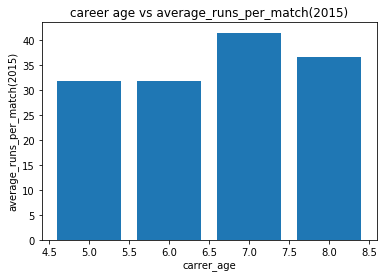

In [1047]:
plt.bar(reg_x_with_oneyear_career_age.career_age,reg_x_with_oneyear_career_age[('runs_per_match',2015)])
plt.title('career age vs average_runs_per_match(2015)')
plt.xlabel('carrer_age')
plt.ylabel('average_runs_per_match(2015)')

Text(0,0.5,'career_average_runs_per_match(2015)')

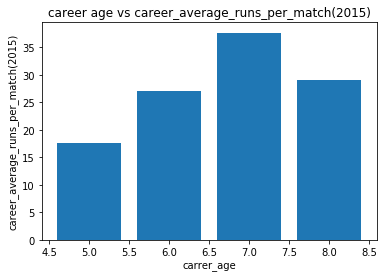

In [1048]:
plt.bar(reg_x_with_oneyear_career_age.career_age,reg_x_with_oneyear_career_age.career_runs_match)
plt.title('career age vs career_average_runs_per_match(2015)')
plt.xlabel('carrer_age')
plt.ylabel('career_average_runs_per_match(2015)')

In [1050]:
from scipy import stats


In [1379]:
reg_x_with_std_last_year = reg_x.drop([('age', 2008),('age', 2009),('age', 2010),('age', 2011),('age', 2012),('age', 2013),('age', 2014),('runs_per_match', 2008),('runs_per_match', 2009),('runs_per_match', 2010),('runs_per_match', 2011),('runs_per_match', 2012),('runs_per_match', 2013),('runs_per_match', 2014)],axis =1 )

In [1381]:
reg_x_with_std_last_year.head()

,"(player_id, )","(age, 2015)","(runs_per_match, 2015)","(std, )",career_runs_match,career_age
0,9,33.0,2.000000,4.485665,6.586706,8
1,12,36.0,0.250000,7.726678,3.250000,6
2,25,30.0,36.642857,7.272664,26.208562,8
3,37,29.0,7.666667,9.533256,20.056777,6
4,41,27.0,41.538462,8.302900,24.516265,7


In [1529]:
X_train, X_test, y_train, y_test = train_test_split(reg_x_with_std_last_year,y)

In [1383]:
LR_std = LinearRegression()

In [1384]:
LR_std.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [1385]:
LR_std.score(X_test, y_test)

0.8469375483961336

In [1386]:
predict = LR_std.predict(X_test)

In [1387]:
mean_squared_error(y_test, predict)

14.807999135629357

In [1393]:
predict


array([19.87996647, 33.30052993, 22.55827834, 18.72742583, 23.18735967,
        7.90472138, 31.85731073,  3.74042366, 28.86231085, 25.65131481,
       20.65114419,  2.85531919, 29.44436741])

In [1394]:
y_test

array([22.5       , 34.28571429, 27.83333333, 12.13333333, 22.54545455,
        2.        , 26.5       ,  5.4       , 23.875     , 27.76923077,
       22.33333333,  5.375     , 26.6       ])

In [1478]:
reg_x_with_std_last_year.head()

,"(player_id, )","(age, 2015)","(runs_per_match, 2015)","(std, )",career_runs_match,career_age
0,9,33.0,2.000000,4.485665,6.586706,8
1,12,36.0,0.250000,7.726678,3.250000,6
2,25,30.0,36.642857,7.272664,26.208562,8
3,37,29.0,7.666667,9.533256,20.056777,6
4,41,27.0,41.538462,8.302900,24.516265,7


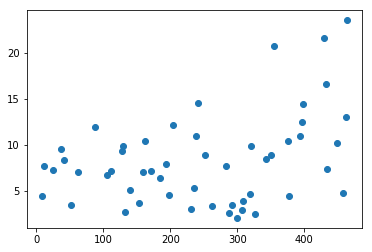

In [1408]:
plt.scatter(reg_x_with_std_last_year['player_id', ''], reg_x_with_std_last_year['std', ''])

In [1833]:
reg_x_with_std_last_year.head()

,"(player_id, )","(age, 2015)","(runs_per_match, 2015)","(std, )",career_runs_match,career_age
0,9,33.0,2.000000,4.485665,6.586706,8
1,12,36.0,0.250000,7.726678,3.250000,6
2,25,30.0,36.642857,7.272664,26.208562,8
3,37,29.0,7.666667,9.533256,20.056777,6
4,41,27.0,41.538462,8.302900,24.516265,7


In [1410]:
indices = np.arange(y.shape[0])
np.random.shuffle(indices)

In [1497]:
X = reg_x_with_std_last_year.drop(('player_id', ''), axis = 1).values

In [1417]:
y_df = pd.DataFrame(y)

In [1420]:
y_df.head()


,0
0,2.000000
1,1.000000
2,42.937500
3,32.750000
4,34.285714


In [1428]:
 X, y = X[indices], y[indices]

In [1434]:
from sklearn.model_selection import validation_curve
from sklearn.linear_model import Ridge

In [1436]:
train_scores, valid_scores = validation_curve(l(), X, y, "alpha",
                                              np.logspace(-7, 3, 3),
                                               cv=5)

In [1437]:
train_scores

array([[0.07312196, 0.15319972, 0.10069074, 0.17736446, 0.13691693],
       [0.07312196, 0.15319972, 0.10069074, 0.17736445, 0.13691692],
       [0.03750134, 0.10371642, 0.04922284, 0.14884759, 0.0582268 ]])

In [1438]:
valid_scores

array([[ 0.11274864, -1.06818592, -0.07195647, -0.53066626, -1.11616265],
       [ 0.11276154, -1.06802458, -0.0718985 , -0.53069065, -1.11610983],
       [ 0.06284245, -0.536268  ,  0.05092168, -0.57474425, -0.04535393]])

In [1444]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(valid_scores, axis=1)
test_scores_std = np.std(valid_scores, axis=1)

In [1446]:
param_range = np.logspace(-6, -1, 5)


In [1449]:
from sklearn.model_selection import learning_curve


In [1452]:
train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), X, y, train_sizes=[1, 20, 41], cv=5)


In [1453]:
train_sizes

array([ 1, 20, 41])

In [1454]:
train_scores

array([[1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.33424604, 0.23849188, 0.25033965, 0.25033965, 0.25033965],
       [0.07312196, 0.15319972, 0.10700473, 0.1744897 , 0.13459237]])

In [1455]:
valid_scores

array([[-0.03467684, -1.35741052, -0.7486752 , -0.0352699 , -0.89286678],
       [-0.02462514, -0.18965884, -0.23399134, -0.20942719, -1.6786706 ],
       [ 0.11274864, -1.06818592, -0.12588047, -0.46902608, -1.13416186]])

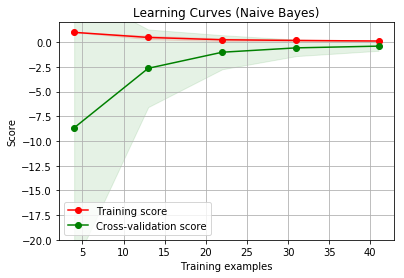

In [1465]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt




title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = LinearRegression()
plot_learning_curve(estimator, title, X, y, ylim=(-20, 2.01), cv=cv, n_jobs=4)

# title = "Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# # SVC is more expensive so we do a lower number of CV iterations:
# cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
# estimator = SVC(gamma=0.001)
# plot_learning_curve(estimator, title, X, y, (0.7, 1.01), cv=cv, n_jobs=4)
plt.show()

In [1483]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

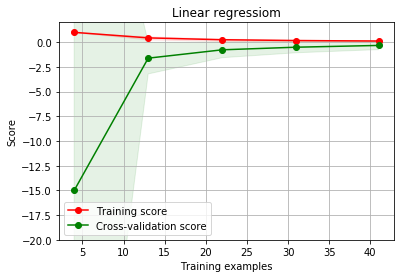

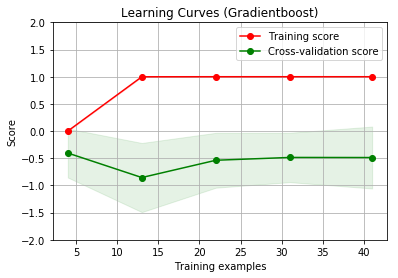

In [1481]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit



def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt




title = "Linear regressiom"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = LinearRegression()
plot_learning_curve(estimator, title, X, y, ylim=(-20, 2.01), cv=cv, n_jobs=4)

title = "Learning Curves (Gradientboost)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = GradientBoostingRegressor(learning_rate=0.05, max_depth= 3, min_samples_leaf= 3,n_estimators=50000 )
plot_learning_curve(estimator, title, X, y, (-2, 2), cv=cv, n_jobs=4)
plt.show()

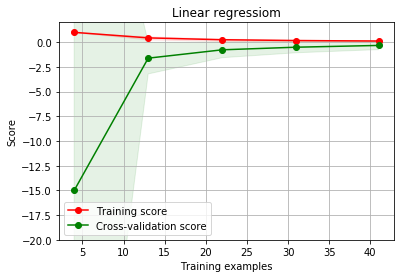

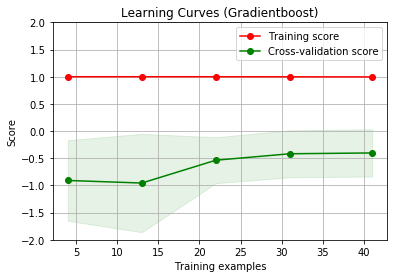

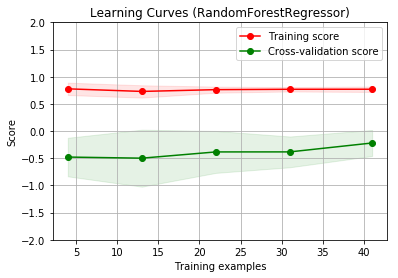

In [1485]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit



def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt




title = "Linear regressiom"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = LinearRegression()
plot_learning_curve(estimator, title, X, y, ylim=(-20, 2.01), cv=cv, n_jobs=4)

title = "Learning Curves (Gradientboost)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = GradientBoostingRegressor()
plot_learning_curve(estimator, title, X, y, (-2, 2), cv=cv, n_jobs=4)

title = "Learning Curves (RandomForestRegressor)"

estimator = RandomForestRegressor()

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
plot_learning_curve(estimator, title, X, y, (-2, 2), cv=cv, n_jobs=4)
plt.show()

In [1486]:
from sklearn.model_selection import KFold

In [1487]:
kfold = KFold(10)

In [1492]:
for train,test in kfold.split(X):
    print('train: {}, test:{}'.format(X[train], X[test]))

train: [[24.          5.66666667  7.00764013  3.58888889  5.        ]
 [36.         35.07142857 11.93438328 37.65759637  7.        ]
 [29.         40.14285714  6.77448443 29.90389967  7.        ]
 [32.         15.          7.11649782 14.5780506   8.        ]
 [32.         24.9375      9.34296172 23.97733516  7.        ]
 [27.          2.          9.85320546  6.08333333  6.        ]
 [32.          6.66666667  2.74478642  4.484375    8.        ]
 [34.         25.15384615  5.06957933 27.24667737  8.        ]
 [35.         13.          3.68414823 10.25203234  8.        ]
 [ 0.          0.          7.0258943  14.10952381  7.        ]
 [26.         10.         10.4617674   3.91666667  6.        ]
 [34.         28.66666667  7.16164451 15.66344697  8.        ]
 [31.         31.84615385  6.35463604 27.02859178  6.        ]
 [28.         29.92857143  7.96426419 20.52142857  6.        ]
 [30.         12.81818182  4.53540113 20.21285869  8.        ]
 [29.         15.75       12.11744094 13.11     

In [1489]:
train

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46])

In [1491]:
kfold

KFold(n_splits=10, random_state=None, shuffle=False)

In [1494]:
from sklearn.model_selection import cross_val_score

In [1520]:
lr_score = cross_val_score(LinearRegression(), X,y, scoring='mean_squared_error', cv =5)

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/m

In [1521]:
scores = cross_val_score(RandomForestRegressor(), X,y, scoring='mean_squared_error', cv =5)

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/m

In [1522]:
scores.mean()


-107.2548563904051

In [1523]:
scores.std()

80.11483288398834

In [1524]:
lr_score.mean()

-85.76373911522512

In [1525]:
lr_score.std()

58.78176403420508

In [1526]:
from sklearn.linear_model import RidgeCV

In [1530]:
rv = RidgeCV(scoring='mean_squared_error').fit(X_train,y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


In [1534]:
rv.score(X_test,y_test)

0.5880162480335421

In [1532]:
pred = rv.predict(X_test)

In [1533]:
mean_squared_error(y_test, pred)

126.43966349827696

In [1572]:
reg_x.head()

,"(player_id, )","(age, 2008)","(age, 2009)","(age, 2010)","(age, 2011)","(age, 2012)","(age, 2013)","(age, 2014)","(age, 2015)","(runs_per_match, 2008)","(runs_per_match, 2009)","(runs_per_match, 2010)","(runs_per_match, 2011)","(runs_per_match, 2012)","(runs_per_match, 2013)","(runs_per_match, 2014)","(runs_per_match, 2015)","(std, )",career_runs_match,career_age
0,9,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,12.333333,5.200000,5.571429,7.555556,3.200000,14.833333,2.000000,2.000000,4.485665,6.586706,8
1,12,29.0,30.0,31.0,0.0,33.0,34.0,0.0,36.0,1.000000,1.000000,11.500000,0.000000,5.500000,0.250000,0.000000,0.250000,7.726678,3.250000,6
2,25,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,15.833333,35.769231,15.857143,24.000000,24.538462,26.642857,30.384615,36.642857,7.272664,26.208562,8
3,37,0.0,0.0,24.0,25.0,26.0,27.0,28.0,29.0,0.000000,0.000000,21.000000,7.833333,27.500000,32.571429,23.769231,7.666667,9.533256,20.056777,6
4,41,20.0,21.0,0.0,23.0,24.0,25.0,26.0,27.0,2.000000,20.571429,0.000000,17.142857,35.000000,27.111111,28.250000,41.538462,8.302900,24.516265,7


In [ ]:
#without ages

In [ ]:
reg_x_without_age = reg_x.drop([('age', 2008),('age', 2009),('age', 2010),('age', 2011),('age', 2012),('age', 2013),('age', 2014),('age', 2015)],axis =1 )

In [1574]:
reg_x.head()

,"(player_id, )","(age, 2008)","(age, 2009)","(age, 2010)","(age, 2011)","(age, 2012)","(age, 2013)","(age, 2014)","(age, 2015)","(runs_per_match, 2008)","(runs_per_match, 2009)","(runs_per_match, 2010)","(runs_per_match, 2011)","(runs_per_match, 2012)","(runs_per_match, 2013)","(runs_per_match, 2014)","(runs_per_match, 2015)","(std, )",career_runs_match,career_age
0,9,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,12.333333,5.200000,5.571429,7.555556,3.200000,14.833333,2.000000,2.000000,4.485665,6.586706,8
1,12,29.0,30.0,31.0,0.0,33.0,34.0,0.0,36.0,1.000000,1.000000,11.500000,0.000000,5.500000,0.250000,0.000000,0.250000,7.726678,3.250000,6
2,25,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,15.833333,35.769231,15.857143,24.000000,24.538462,26.642857,30.384615,36.642857,7.272664,26.208562,8
3,37,0.0,0.0,24.0,25.0,26.0,27.0,28.0,29.0,0.000000,0.000000,21.000000,7.833333,27.500000,32.571429,23.769231,7.666667,9.533256,20.056777,6
4,41,20.0,21.0,0.0,23.0,24.0,25.0,26.0,27.0,2.000000,20.571429,0.000000,17.142857,35.000000,27.111111,28.250000,41.538462,8.302900,24.516265,7


In [1607]:
reg_1 = reg_x[[('player_id', ''),'career_runs_match']]

In [1608]:
reg_2 = reg_x[[('player_id', ''), ('runs_per_match', 2015), 'career_runs_match']]

In [1700]:
reg_3 = reg_x[[('player_id', ''), ('runs_per_match', 2015), 'career_runs_match', 'career_age']]

In [1606]:
reg_4 = reg_x[[('player_id', ''), ('runs_per_match', 2015), 'career_runs_match', 'career_age', ('std', '')]]

In [1588]:
reg_5 = reg_x[[('player_id', ''),'career_runs_match','career_age', ('std', ''),('runs_per_match', 2015),('runs_per_match', 2014)]]

In [1591]:
reg_6 = reg_x[[('player_id', ''),'career_runs_match','career_age', ('std', ''),('runs_per_match', 2015),('runs_per_match', 2014)]]


In [1593]:
reg_7 = reg_x[[('player_id', ''),'career_runs_match','career_age', ('std', ''),('runs_per_match', 2015),('runs_per_match', 2014),('runs_per_match', 2013)]]

In [1601]:
reg_8 = reg_x[[('player_id', ''),'career_runs_match','career_age', ('runs_per_match', 2015),('runs_per_match', 2014),('runs_per_match', 2013),('runs_per_match', 2012)]]

In [1602]:
reg_9 = reg_x[[('player_id', ''),'career_runs_match','career_age', ('runs_per_match', 2015),('runs_per_match', 2014),('runs_per_match', 2013),('runs_per_match', 2012),('runs_per_match', 2011)]]

In [1603]:
reg_10 =reg_x[[('player_id', ''),'career_runs_match','career_age', ('runs_per_match', 2015),('runs_per_match', 2014),('runs_per_match', 2013),('runs_per_match', 2012),('runs_per_match', 2011),('runs_per_match', 2010)]]


In [1604]:
reg_11 = reg_x[[('player_id', ''),'career_runs_match','career_age', ('runs_per_match', 2015),('runs_per_match', 2014),('runs_per_match', 2013),('runs_per_match', 2012),('runs_per_match', 2011),('runs_per_match', 2010),('runs_per_match', 2009)]]

In [1605]:
reg_12 = reg_x[[('player_id', ''),'career_runs_match','career_age', ('runs_per_match', 2015),('runs_per_match', 2014),('runs_per_match', 2013),('runs_per_match', 2012),('runs_per_match', 2011),('runs_per_match', 2010),('runs_per_match', 2009),('runs_per_match', 2008)]]

In [1618]:
regs = [reg_1,reg_2, reg_3, reg_4, reg_5, reg_6,reg_7, reg_8, reg_9, reg_10, reg_11,reg_12]

In [1648]:
mses = []
for reg in regs:
  
    X_train, X_test, y_train, y_test = train_test_split(reg,y)
    linear = LinearRegression()
    linear.fit(X_train,y_train)
    linear.score(X_test, y_test)
    predict = linear.predict(X_test)
    mse = mean_squared_error(y_test, predict)
    mses.append(mse)
    
    

In [1649]:
mses

[47.79775699517958,
 32.51155198724319,
 38.264613534127804,
 130.82580350530336,
 123.14375059612085,
 122.65491482118848,
 105.51602282505202,
 59.199270359444036,
 75.0345303465978,
 152.54388440352014,
 78.52283786196705,
 113.921518098148]

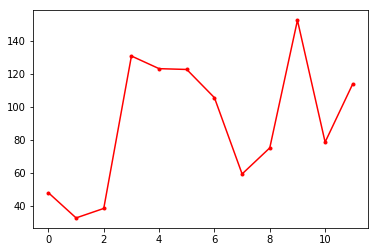

In [1650]:
plt.plot(np.arange(len(mses)), mses, '.r-')

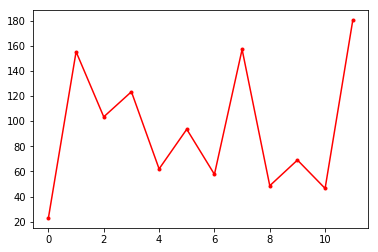

In [1651]:
mses = []
for reg in regs:
  
    X_train, X_test, y_train, y_test = train_test_split(reg,y)
    linear = RandomForestRegressor()
    linear.fit(X_train,y_train)
    linear.score(X_test, y_test)
    predict = linear.predict(X_test)
    mse = mean_squared_error(y_test, predict)
    mses.append(mse)
plt.plot(np.arange(len(mses)), mses, '.r-')

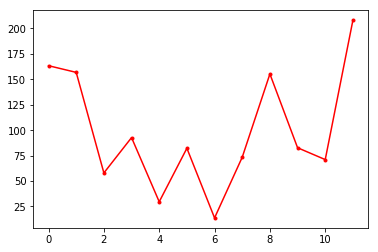

In [1652]:
mses = []
for reg in regs:
  
    X_train, X_test, y_train, y_test = train_test_split(reg,y)
    linear = GradientBoostingRegressor()
    linear.fit(X_train,y_train)
    linear.score(X_test, y_test)
    predict = linear.predict(X_test)
    mse = mean_squared_error(y_test, predict)
    mses.append(mse)
plt.plot(np.arange(len(mses)), mses, '.r-')

In [1693]:
X_train, X_test, y_train, y_test = train_test_split(reg_4.drop(('player_id', ''), axis=1),y,test_size=.30)
linear = LinearRegression()
linear.fit(X_train,y_train)
linear.score(X_test, y_test)
predict = linear.predict(X_test)
mean_squared_error(y_test, predict)

77.80660887571871

Text(0.5,1,'runs per match average vs predicted runs per match')

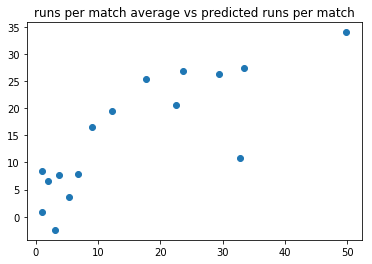

In [1685]:
plt.scatter(y_test, predict)
plt.title('runs per match average vs predicted runs per match')

In [1696]:
kf=KFold(n_splits=5)
X_train, X_test, y_train, y_test = train_test_split(reg_4,y)
train_score_lists = [[],[],[],[]]
test_score_lists = [[],[],[],[]]


In [1697]:
for train, validation in kf.split(X_train,y_train):
    for i in range(len(train_score_lists)):
        lin = LinearRegression()
        lin.fit(x_list[i][train],y_train[train])
        train_score_lists[i].append(mean_squared_error(lin.predict(x_list[i][train]),y_train[train]))
        test_score_lists[i].append(mean_squared_error(lin.predict(x_list[i][validation]),y_train[validation]))

print('Training k=5 Avg of Mean Squared Errors')
for score_list in train_score_lists:
    print(np.mean(score_list))
print('\nTest k=5 Avg of Mean Squared Errors')    
for score_list in test_score_lists:
    print(np.mean(score_list))

NameError: name 'x_list' is not defined

In [1724]:
reg_x.head()

,"(player_id, )","(age, 2008)","(age, 2009)","(age, 2010)","(age, 2011)","(age, 2012)","(age, 2013)","(age, 2014)","(age, 2015)","(runs_per_match, 2008)","(runs_per_match, 2009)","(runs_per_match, 2010)","(runs_per_match, 2011)","(runs_per_match, 2012)","(runs_per_match, 2013)","(runs_per_match, 2014)","(runs_per_match, 2015)","(std, )",career_runs_match,career_age
0,9,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,12.333333,5.200000,5.571429,7.555556,3.200000,14.833333,2.000000,2.000000,4.485665,6.586706,8
1,12,29.0,30.0,31.0,0.0,33.0,34.0,0.0,36.0,1.000000,1.000000,11.500000,0.000000,5.500000,0.250000,0.000000,0.250000,7.726678,3.250000,6
2,25,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,15.833333,35.769231,15.857143,24.000000,24.538462,26.642857,30.384615,36.642857,7.272664,26.208562,8
3,37,0.0,0.0,24.0,25.0,26.0,27.0,28.0,29.0,0.000000,0.000000,21.000000,7.833333,27.500000,32.571429,23.769231,7.666667,9.533256,20.056777,6
4,41,20.0,21.0,0.0,23.0,24.0,25.0,26.0,27.0,2.000000,20.571429,0.000000,17.142857,35.000000,27.111111,28.250000,41.538462,8.302900,24.516265,7


In [1712]:
reg_1 = reg_x[['career_runs_match']]

In [1713]:
reg_2 = reg_x[[('runs_per_match', 2015), 'career_runs_match']]

In [1714]:
reg_3 = reg_x[[('runs_per_match', 2015), 'career_runs_match', 'career_age']]

In [1715]:
reg_4 = reg_x[[('runs_per_match', 2015), 'career_runs_match', 'career_age', ('std', '')]]

In [1757]:
reg_5 = reg_x[[ ('std', ''),'career_runs_match','career_age',('runs_per_match', 2015),('runs_per_match', 2014)]]

In [1758]:
reg_6 = reg_x[[('std', ''),'career_runs_match','career_age',('runs_per_match', 2015),('runs_per_match', 2014)]]


In [1759]:
reg_7 = reg_x[[('std', ''),'career_runs_match','career_age',('runs_per_match', 2015),('runs_per_match', 2014),('runs_per_match', 2013)]]

In [1760]:
reg_8 = reg_x[[('std', ''), ('runs_per_match', 2015),'career_runs_match','career_age',('runs_per_match', 2014),('runs_per_match', 2013),('runs_per_match', 2012)]]

In [1761]:
reg_9 = reg_x[[('std', ''),('runs_per_match', 2015),'career_runs_match','career_age',('runs_per_match', 2014),('runs_per_match', 2013),('runs_per_match', 2012),('runs_per_match', 2011)]]

In [1762]:
reg_10 =reg_x[[ ('std', ''),('runs_per_match', 2015),'career_runs_match','career_age',('runs_per_match', 2014),('runs_per_match', 2013),('runs_per_match', 2012),('runs_per_match', 2011),('runs_per_match', 2010)]]


In [1763]:
reg_11 = reg_x[[ ('std', ''),('runs_per_match', 2015),'career_runs_match','career_age',('runs_per_match', 2014),('runs_per_match', 2013),('runs_per_match', 2012),('runs_per_match', 2011),('runs_per_match', 2010),('runs_per_match', 2009)]]

In [1765]:
reg_12 = reg_x[[('std', ''),('runs_per_match', 2015),'career_runs_match','career_age',('runs_per_match', 2014),('runs_per_match', 2013),('runs_per_match', 2012),('runs_per_match', 2011),('runs_per_match', 2010),('runs_per_match', 2009),('runs_per_match', 2008)]]

In [1735]:
regs = [reg_1,reg_2, reg_3, reg_4, reg_5, reg_6,reg_7, reg_8, reg_9, reg_10, reg_11,reg_12]

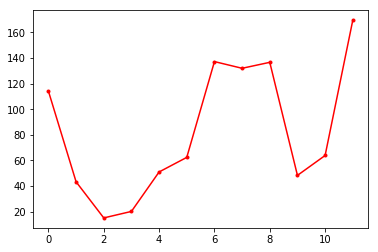

In [1766]:
mses = []
for reg in regs:
  
    X_train, X_test, y_train, y_test = train_test_split(reg,y)
    linear = LinearRegression()
    linear.fit(X_train,y_train)
    linear.score(X_test, y_test)
    predict = linear.predict(X_test)
    mse = mean_squared_error(y_test, predict)
    mses.append(mse)
    
plt.plot(np.arange(len(mses)), mses, '.r-')  

In [1720]:
learning_curve()

[57.98835988771685, 130.80263338053146, 169.44407376011603, 55.52549484324223]

In [1747]:
X = reg_x_tr

In [1750]:
X[:,0]

array([20.07142857, 21.88235294,  2.        , 38.55555556,  7.71428571,
        4.        , 23.25      ,  0.25      ,  5.66666667,  0.        ,
       31.5625    , 18.75      , 20.4       ,  0.        , 10.        ,
       12.        , 26.        , 30.125     , 29.92857143, 15.        ,
       25.15384615, 18.16666667, 36.64285714, 41.53846154, 24.9375    ,
       25.21428571,  0.        , 12.81818182, 12.45454545,  9.25      ,
       28.        , 40.14285714,  7.66666667, 19.07692308,  4.25      ,
        8.66666667, 35.07142857,  2.        , 24.21428571])

In [1769]:
X = reg_1.values

In [1775]:
reg_12.head()

,"(std, )","(runs_per_match, 2015)",career_runs_match,career_age,"(runs_per_match, 2014)","(runs_per_match, 2013)","(runs_per_match, 2012)","(runs_per_match, 2011)","(runs_per_match, 2010)","(runs_per_match, 2009)","(runs_per_match, 2008)"
0,4.485665,2.000000,6.586706,8,2.000000,14.833333,3.200000,7.555556,5.571429,5.200000,12.333333
1,7.726678,0.250000,3.250000,6,0.000000,0.250000,5.500000,0.000000,11.500000,1.000000,1.000000
2,7.272664,36.642857,26.208562,8,30.384615,26.642857,24.538462,24.000000,15.857143,35.769231,15.833333
3,9.533256,7.666667,20.056777,6,23.769231,32.571429,27.500000,7.833333,21.000000,0.000000,0.000000
4,8.302900,41.538462,24.516265,7,28.250000,27.111111,35.000000,17.142857,0.000000,20.571429,2.000000


In [1774]:
X_train, X_test, y_train, y_test = train_test_split(X,y)


In [1827]:
x0 = X_train[:,0].reshape(-1,1)
x1 = X_train[:,1].reshape(-1,1)
x2= X_train[:,2].reshape(-1,1)
x3= X_train[:,3].reshape(-1,1)
x4= X_train[:,4].reshape(-1,1)
x5= X_train[:,5].reshape(-1,1)
x6= X_train[:,6].reshape(-1,1)
x7= X_train[:,7].reshape(-1,1)
x8 = X_train[:,:2]
x9= X_train[:,:3]
x10= X_train[:,:4]
x11= X_train[:,:5]
x12= X_train[:,:6]
x13= X_train[:,:7]
x14= X_train[:,:8]
x16 = X_train[:,:1]
x15 =X_train

In [1866]:
t0 = X_test[:,0].reshape(-1,1)
t1 = X_test[:,1].reshape(-1,1)
t2= X_test[:,2].reshape(-1,1)
t3= X_test[:,3].reshape(-1,1)
t4= X_test[:,4].reshape(-1,1)
t5= X_test[:,5].reshape(-1,1)
t6= X_test[:,6].reshape(-1,1)
t7= X_test[:,7].reshape(-1,1)
t8 = X_test[:,:2]
t9= X_test[:,:3]
t10= X_test[:,:4]
t11= X_test[:,:5]
t12= X_test[:,:6]
t13= X_test[:,:7]
t14= X_test[:,:8]
t16 = X_test[:,:1]
t15 =X_test

In [1828]:
x_list = [x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15, x16]

In [1867]:
t_list = [t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16]

In [ ]:
for x, t in zip(x_list, t_list):
    lin = RandomForestRegressor()
    lin.fit(x,y_train)
    pred = lin.predict(t)
    mse.append(mean_squared_error(y_test, pred))
    lin.predict(test_reg_y)
    mse_test.append(mean_squared_error(test_reg_y,))
    print lat, long

In [2425]:
cvs = []
for x_version in x_list:
    lin = GradientBoostingRegressor(learning_rate=0.05, max_depth= 3, min_samples_leaf= 3,n_estimators=50000 )
    cvs.append(cross_val_score(lin, x_version, y_train, cv=5, scoring='neg_mean_squared_error').mean())
cvs

[-316.60709679610227,
 -290.22509312701027,
 -240.6498477662555,
 -199.36816897104657,
 -185.37353687614296,
 -224.01935429904248,
 -201.27519546225213,
 -198.70327076573398,
 -316.60709679610227,
 -309.35093715631,
 -331.1566477016597,
 -330.8323661927203,
 -332.4389753757449,
 -342.66903397869794,
 -341.23146201429006,
 -340.3178898726459,
 -250.71393759917777]

In [2434]:
pos_cvs = (np.array(cvs))*-1

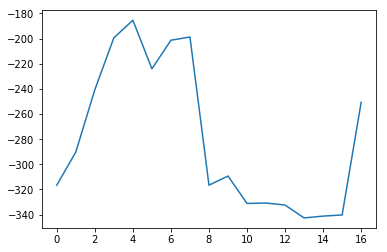

In [2429]:
plt.plot(np.arange(len(cvs)),pos_cvs)
plt.

Text(0.5,1,'training cross val score')

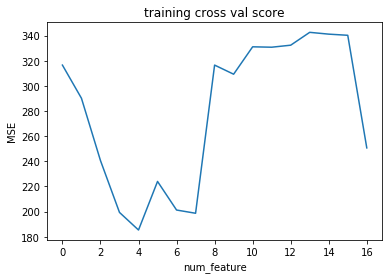

In [2437]:
plt.plot(np.arange(len(cvs)),pos_cvs)
plt.xlabel("num_feature")
plt.ylabel("MSE")
plt.title('training cross val score')


In [ ]:
for lat, long in zip(Latitudes, Longitudes):
    print lat, long

In [2022]:
lin_final = GradientBoostingRegressor(learning_rate=0.05, max_depth= 3, min_samples_leaf= 3,n_estimators=5000)
lin_final.fit(x2, y_train)
pred = lin_final.predict(X_test[:,2].reshape(-1,1))
print(mean_squared_error(lin_final.predict(X_test[:,2].reshape(-1,1)), y_test))

46.897577567104236


In [ ]:
plt.scatter(y_test, pred)
plt.xlabel("actual runs scored")
plt.ylabel("runs scored predicted")


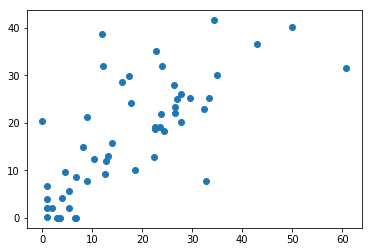

In [2027]:
plt.scatter(runs_avg_2016, run_avg_2015)

In [ ]:
for x_version in x_list,test_list:
    lin = RandomForestRegressor()
    lin.fit(x_version,y_train)
    pred = lin.predict()
    lvs.append(cross_val_score(lin, x_version, y_train, cv=10, scoring='neg_mean_squared_error').mean())
cvs

In [1842]:
reg_12.head()

,"(std, )","(runs_per_match, 2015)",career_runs_match,career_age,"(runs_per_match, 2014)","(runs_per_match, 2013)","(runs_per_match, 2012)","(runs_per_match, 2011)","(runs_per_match, 2010)","(runs_per_match, 2009)","(runs_per_match, 2008)"
0,4.485665,2.000000,6.586706,8,2.000000,14.833333,3.200000,7.555556,5.571429,5.200000,12.333333
1,7.726678,0.250000,3.250000,6,0.000000,0.250000,5.500000,0.000000,11.500000,1.000000,1.000000
2,7.272664,36.642857,26.208562,8,30.384615,26.642857,24.538462,24.000000,15.857143,35.769231,15.833333
3,9.533256,7.666667,20.056777,6,23.769231,32.571429,27.500000,7.833333,21.000000,0.000000,0.000000
4,8.302900,41.538462,24.516265,7,28.250000,27.111111,35.000000,17.142857,0.000000,20.571429,2.000000


In [1843]:
reg_12.columns

Index([             ('std', ''), ('runs_per_match', 2015),
            'career_runs_match',             'career_age',
       ('runs_per_match', 2014), ('runs_per_match', 2013),
       ('runs_per_match', 2012), ('runs_per_match', 2011),
       ('runs_per_match', 2010), ('runs_per_match', 2009),
       ('runs_per_match', 2008)],
      dtype='object')

In [1845]:
reg_12[('runs_per_match', 2015),('std', '')]#,'career_runs_match','career_age']
#             ('runs_per_match', 2014), ('runs_per_match', 2013),('runs_per_match', 2012), 
#             ('runs_per_match', 2011),('runs_per_match', 2010), ('runs_per_match', 2009),('runs_per_match', 2008)]

KeyError: (('std', ''), ('runs_per_match', 2015), 'career_runs_match', 'career_age', ('runs_per_match', 2014), ('runs_per_match', 2013), ('runs_per_match', 2012), ('runs_per_match', 2011), ('runs_per_match', 2010), ('runs_per_match', 2009), ('runs_per_match', 2008))

In [1856]:
x_1 = X[:,2].reshape(-1,1)

No handles with labels found to put in legend.


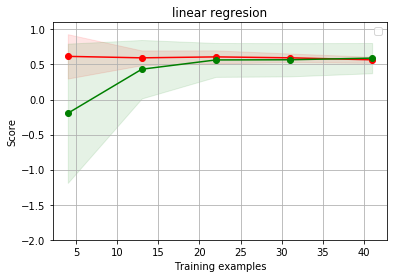

In [1859]:

# instantiate
lg = LinearRegression()

# fit
lg.fit(x_1, y)


"""
Generate a simple plot of the test and traning learning curve.

Parameters
----------
estimator : object type that implements the "fit" and "predict" methods
    An object of that type which is cloned for each validation.

title : string
    Title for the chart.

X : array-like, shape (n_samples, n_features)
    Training vector, where n_samples is the number of samples and
    n_features is the number of features.

y : array-like, shape (n_samples) or (n_samples, n_features), optional
    Target relative to X for classification or regression;
    None for unsupervised learning.

ylim : tuple, shape (ymin, ymax), optional
    Defines minimum and maximum yvalues plotted.

cv : integer, cross-validation generator, optional
    If an integer is passed, it is the number of folds (defaults to 3).
    Specific cross-validation objects can be passed, see
    sklearn.cross_validation module for the list of possible objects

n_jobs : integer, optional
    Number of jobs to run in parallel (default 1).

x1 = np.linspace(0, 10, 8, endpoint=True) produces
    8 evenly spaced points in the range 0 to 10
"""

train_sizes, train_scores, test_scores = learning_curve(lg, x_1, y, n_jobs=-1, cv=cv, train_sizes=np.linspace(.1, 1.0, 5), verbose=0)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("linear regresion")
plt.legend(loc="best")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.gca().invert_yaxis()

# box-like grid
plt.grid()

# plot the std deviation as a transparent range at each training set size
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

# plot the average training and test score lines at each training set size
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

# sizes the window for readability and displays the plot
# shows error from 0 to 1.1
plt.ylim(-2,1.1)
plt.show()

In [2224]:
X_final = test_reg_x.values
y_final = (test_reg_y.values)[:,1]

In [2220]:
y = (train_reg_y.values)[:,1]
X = train_reg_x.values

In [2223]:
X_train, X_test, y_train, y_test = train_test_split(X,y)


In [2204]:
x0 = X_train[:,0].reshape(-1,1)
x1 = X_train[:,1].reshape(-1,1)
x2= X_train[:,2].reshape(-1,1)
x3= X_train[:,3].reshape(-1,1)
x4= X_train[:,4].reshape(-1,1)
x5= X_train[:,5].reshape(-1,1)
x6= X_train[:,6].reshape(-1,1)
x7= X_train[:,7].reshape(-1,1)
x8 = X_train[:,:1]

x9 = X_train[:,:2]
x10= X_train[:,:3]
x11= X_train[:,:4]
x12= X_train[:,:5]
x13= X_train[:,:6]
x14= X_train[:,:7]
x15= X_train[:,:8]
x16 =X_train

In [2205]:
t0 = X_test[:,0].reshape(-1,1)
t1 = X_test[:,1].reshape(-1,1)
t2= X_test[:,2].reshape(-1,1)
t3= X_test[:,3].reshape(-1,1)
t4= X_test[:,4].reshape(-1,1)
t5= X_test[:,5].reshape(-1,1)
t6= X_test[:,6].reshape(-1,1)
t7= X_test[:,7].reshape(-1,1)
t8 = X_test[:,:1]

t9 = X_test[:,:2]
t10= X_test[:,:3]
t11= X_test[:,:4]
t12= X_test[:,:5]
t13= X_test[:,:6]
t14= X_test[:,:7]
t15= X_test[:,:8]
t16 =X_test

In [2206]:
f0 = X_final[:,0].reshape(-1,1)
f1 = X_final[:,1].reshape(-1,1)
f2= X_final[:,2].reshape(-1,1)
f3= X_final[:,3].reshape(-1,1)
f4= X_final[:,4].reshape(-1,1)
f5= X_final[:,5].reshape(-1,1)
f6= X_final[:,6].reshape(-1,1)
f7= X_final[:,7].reshape(-1,1)
f8 = X_final[:,:1]
f9 = X_final[:,:2]
f10= X_final[:,:3]
f11= X_final[:,:4]
f12= X_final[:,:5]
f13= X_final[:,:6]
f14= X_final[:,:7]
f15= X_final[:,:8]
f16 =X_final

In [2136]:
x_list = [x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15, x16]

In [2137]:
t_list = [t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16]

In [2138]:
final_x =[f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16]

In [2139]:
train_mse = []
test_mse = []

In [2184]:

lin = LinearRegression()
lin.fit(x16,y_train)
pred = lin.predict(t16)
train_mse.append(mean_squared_error(y_test, pred))
pred_final = lin.predict(f16)
test_mse.append(mean_squared_error(y_final, pred_final))

In [2185]:
train_mse

[81.96817145165188,
 76.7058045860207,
 72.19296626938255,
 73.88099961699159,
 78.84418365533998,
 75.66030320107339,
 90.46741517828522,
 84.40048108573495,
 81.96817145165188,
 83.46998909705123,
 80.46538334271567,
 79.32116433955782,
 87.75440709805953,
 87.03154910634954,
 88.98489191830053,
 101.41893310142659,
 60.710369955994075]

In [2186]:
test_mse

[77.15133188571123,
 71.16885618574808,
 70.44501796802504,
 77.96783976859635,
 74.28320452224484,
 72.22414748863804,
 81.81476936040609,
 76.08134540428681,
 77.15133188571123,
 74.37295470891972,
 72.4778420495383,
 77.63490874442456,
 78.17938026951174,
 78.50554511077502,
 78.19807950802301,
 85.5855864280758,
 75.9847900021152]

Text(0,0.5,'MSE')

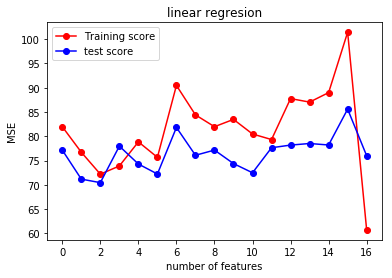

In [2198]:
plt.plot(np.arange(len(train_mse)), train_mse,'o-', color="r", label="Training score")
plt.plot(np.arange(len(train_mse)), test_mse, 'o-', color="b", label="test score")
plt.title("linear regresion")
plt.legend(loc="best")
plt.xlabel("number of features")
plt.ylabel("MSE")


In [2236]:
gb_train_mse = []
gb_test_mse = []

In [2259]:
lin = GradientBoostingRegressor()
lin.fit(x16,y_train)
pred = lin.predict(t16)
gb_train_mse.append(mean_squared_error(y_test, pred))
pred_final = lin.predict(f16)
gb_test_mse.append(mean_squared_error(y_final, pred_final))

In [2260]:
gb_test_mse

[229.47092803792603,
 187.2638671547476,
 150.70839664644055,
 164.8464470789643,
 159.74043256375128,
 177.24170332110793,
 188.32867310074644,
 155.97021903399659,
 229.47092803792603,
 217.02635367103628,
 205.88687603754528,
 199.82716996254084,
 197.01490658955802,
 201.65678853415878,
 193.0229377888018,
 200.3347899881937,
 154.7204301382439]

In [2261]:
gb_train_mse

[152.2456027776934,
 186.18271390245556,
 159.0462894599467,
 133.0244308669474,
 151.01965739368075,
 176.34262706843572,
 187.9788928142956,
 171.32824236488474,
 152.2456027776934,
 142.32299378528188,
 177.8405530315305,
 176.70492601551555,
 170.8563658472249,
 175.5989633528252,
 174.36883460138876,
 174.00561291964627,
 128.59550922265174]

In [2272]:
gb_param_train_mse = []
gb_param_gb_test_mse = []

In [2315]:
lin = GradientBoostingRegressor(learning_rate=0.05, max_depth= 3, min_samples_leaf= 3,n_estimators=50000 )
lin.fit(x16,y_train)
pred = lin.predict(t16)
gb_param_train_mse .append(mean_squared_error(y_test, pred))
pred_final = lin.predict(f16)
gb_param_gb_test_mse .append(mean_squared_error(y_final, pred_final))

In [2316]:
gb_param_train_mse

[198.05276878902293,
 122.01133091360859,
 160.8497194680964,
 136.18051015750285,
 156.3518248014457,
 179.05054909660055,
 135.23036992601743,
 146.09244013188956,
 198.05276878902293,
 257.51578174573086,
 244.30631044207823,
 229.45689294417767,
 295.11388908072865,
 315.5872862693442,
 354.5576333692677,
 344.345657626468,
 96.01602917199564]

In [2317]:
gb_param_gb_test_mse

[234.36299290507677,
 159.86278252769648,
 151.6175696024392,
 166.56083881433943,
 162.24312703772802,
 178.99645010277874,
 161.89162144413137,
 157.7239948362416,
 234.36299290507677,
 211.45608012299212,
 214.82607224918925,
 199.59468729587934,
 218.55401819212008,
 207.74996842790668,
 204.35344559464735,
 205.0916222553857,
 184.07834910576105]

Text(0,0.5,'MSE')

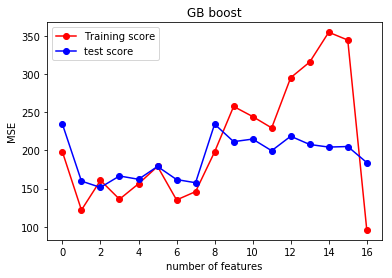

In [2318]:
plt.plot(np.arange(len(gb_param_train_mse)), gb_param_train_mse,'o-', color="r", label="Training score")
plt.plot(np.arange(len(gb_param_gb_test_mse)), gb_param_gb_test_mse, 'o-', color="b", label="test score")
plt.title("GB boost")
plt.legend(loc="best")
plt.xlabel("number of features")
plt.ylabel("MSE")
plt.plot(np.arange(len(gb_param_gb_test_mse),337)

In [2449]:
gb_param_train_mse

[198.05276878902293,
 122.01133091360859,
 160.8497194680964,
 136.18051015750285,
 156.3518248014457,
 179.05054909660055,
 135.23036992601743,
 146.09244013188956,
 198.05276878902293,
 257.51578174573086,
 244.30631044207823,
 229.45689294417767,
 295.11388908072865,
 315.5872862693442,
 354.5576333692677,
 344.345657626468,
 96.01602917199564]

Text(0,0.5,'MSE')

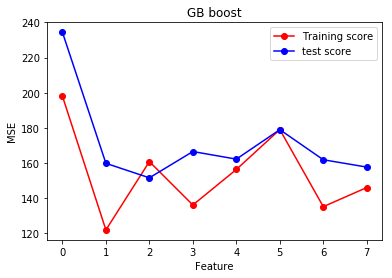

In [2452]:
plt.plot(np.arange(len(gb_param_train_mse[:8])), gb_param_train_mse[:8],'o-', color="r", label="Training score")
plt.plot(np.arange(len(gb_param_gb_test_mse[:8])), gb_param_gb_test_mse[:8], 'o-', color="b", label="test score")
plt.title("GB boost")
plt.legend(loc="best")
plt.xlabel("Feature")
plt.ylabel("MSE")


Text(0,0.5,'MSE')

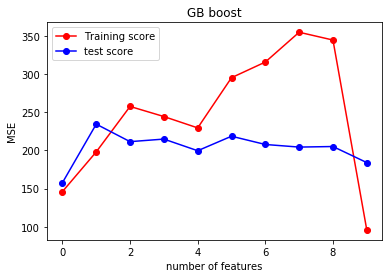

In [2450]:
plt.plot(np.arange(len(gb_param_train_mse[7:])), gb_param_train_mse[7:],'o-', color="r", label="Training score")
plt.plot(np.arange(len(gb_param_gb_test_mse[7:])), gb_param_gb_test_mse[7:], 'o-', color="b", label="test score")
plt.title("GB boost")
plt.legend(loc="best")
plt.xlabel("number of features")
plt.ylabel("MSE")


In [2319]:
check_train_mse = []
check_test_mse = []

In [2346]:

lin = LinearRegression()
lin.fit(x16,y_train)
pred = lin.predict(t16)
check_train_mse.append(mean_squared_error(y_test, pred))
pred_final = lin.predict(f16)
check_test_mse.append(mean_squared_error(y_final, pred_final))

In [2347]:
check_train_mse

[121.50953052215654,
 108.5753289518195,
 130.2195717149283,
 114.29795987192688,
 114.51669210497757,
 113.6424755491016,
 118.31064495168098,
 108.07819998653478,
 121.50953052215654,
 111.06032537371931,
 104.37403189242217,
 107.07740609919065,
 113.16913465558082,
 113.47848972421995,
 122.31246987430929,
 140.37994989132602,
 530.3514204669353]

In [2348]:
check_test_mse

[143.62552225234654,
 139.25437315831562,
 136.5067145314739,
 141.63598593297436,
 139.69973849151484,
 137.9503110881631,
 145.7787590803407,
 129.9300100683764,
 143.62552225234654,
 148.82228557397968,
 179.98037869387284,
 188.14107197073002,
 191.2296501621791,
 190.17918693701364,
 191.60790021979926,
 225.57296877294903,
 411.88219773909924]

Text(0,0.5,'MSE')

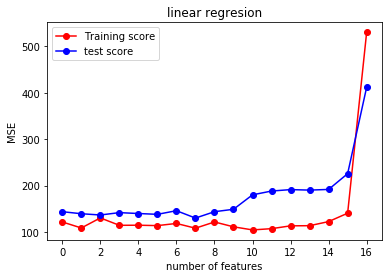

In [2349]:
plt.plot(np.arange(len(check_train_mse)), check_train_mse,'o-', color="r", label="Training score")
plt.plot(np.arange(len(check_train_mse)), check_test_mse, 'o-', color="b", label="test score")
plt.title("linear regresion")
plt.legend(loc="best")
plt.xlabel("number of features")
plt.ylabel("MSE")


In [2371]:
y_1 = (train_reg_y.values)[:,1]
X_1 = train_reg_x.values

In [2372]:
X_train, X_test, y_train, y_test = train_test_split(X,y_1)


In [2373]:
X_final = test_reg_x.values
y_final = (test_reg_y.values)[:,1]

In [2374]:
x2= X_train[:,2].reshape(-1,1)
t2=X_test[:,2].reshape(-1,1)
f2 = X_final[:,2].reshape(-1,1)


In [2382]:
t_mse = []
tt_mse = []

In [2403]:

lin = LinearRegression()
lin.fit(x16,y_train)
pred = lin.predict(t16)
t_mse.append(mean_squared_error(y_test, pred))
pred_final = lin.predict(f16)
tt_mse.append(mean_squared_error(y_final, pred_final))

In [2404]:
t_mse

[248.8481920164803,
 260.2297098593709,
 254.95200274704138,
 243.76314370920167,
 223.72238971845147,
 250.54115989737485,
 277.6611416218059,
 252.62332960208795,
 248.8481920164803,
 260.85486169672663,
 275.3293500993487,
 270.7028822074586,
 247.43715655202593,
 249.7696738424422,
 252.76607745602863,
 253.01630162658043,
 384.26737535778614]

In [2405]:
tt_mse

[137.11502853130327,
 134.82531790615542,
 133.1574181993419,
 145.85447680962397,
 150.17008961331206,
 134.5158918521625,
 152.12972438782967,
 130.49226089983114,
 137.11502853130327,
 134.9273857004361,
 139.46574276303423,
 148.1842213891616,
 154.87671531509545,
 173.76577224766746,
 174.66533318719243,
 174.26011595125388,
 336.6797175309225]

Text(0,0.5,'MSE')

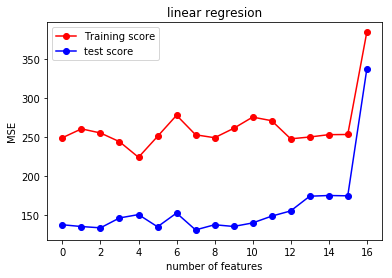

In [2406]:
plt.plot(np.arange(len(tt_mse)), t_mse,'o-', color="r", label="Training score")
plt.plot(np.arange(len(tt_mse)), tt_mse, 'o-', color="b", label="test score")
plt.title("linear regresion")
plt.legend(loc="best")
plt.xlabel("number of features")
plt.ylabel("MSE")


In [2412]:
len(y_final[:52])

52

# baseline

#### test baseline

In [2444]:
mean_squared_error(y_final, pred_final)

336.6797175309225

In [2441]:
len(y)

52

#### train baseline

In [2442]:
mean_squared_error(y_test, pred)

384.26737535778614

### adding consistency feature

In [ ]:
train_17_pl['consistency'] = 0.4262*train_17_pl.Average + 0.2566*train_17_pl.matches + 0.1510*SR + 0.0787*Centuries +
0.0556*Fifties – 0.0328*Zeros 

In [2903]:
train, test = train_and_test(2016, 2016)

/Users/panesar47/galvanize/Performance-predictor-IPL/src/feature_extraction.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['ball']=1
/Users/panesar47/galvanize/Performance-predictor-IPL/src/train_test.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['ball']=1


In [2904]:
reg_X = train.copy()

In [2905]:
### drop all duplicates like brandon mccullum and ganguly!!

In [2762]:
## counting seasonns for player and keeping only 5 or more

In [2763]:
reg_X = reg_X[reg_X.season!=2008]

In [2906]:
reg_X = reg_X.drop_duplicates()

reg_X = reg_X.sort_values(['player_id', 'season'])

reg_X = reg_X[reg_X.batsman_striker != 'BB McCullum']

from collections import Counter
cnt = Counter()

In [2765]:
# settign up counter to count seasons for each [erson]

In [2907]:
for player in reg_X.batsman_striker:
    cnt[player] += 1

    
    

a = pd.DataFrame.from_dict(cnt, orient = 'index').reset_index()

a = a.sort_values(0, ascending=False).reset_index()

a = a.rename(columns={'level_0':'player_id', 'index':'batsman_striker', 0:'seasons_played'})

a.drop('player_id',axis= 1 ,inplace= True)

reg_X = pd.merge(reg_X, a, on= 'batsman_striker', how='outer')
#reg_X['total_seasons_played']= reg_X['seasons_played']-1








In [2908]:
reg_X['total_seasons_played']= reg_X['seasons_played']-1


reg_X.drop(columns='seasons_played', axis=1, inplace=True)




In [2909]:
## keeps only batsman player 2016 and more that 5

In [2910]:
reg_X = reg_X[reg_X.total_seasons_played >= 5]

In [2731]:
## making sure to keep batsman just from 2016

In [2911]:
batin_y = reg_X[reg_X.season ==2016]

batin_y = batin_y[['batsman_striker']]

reg_X = reg_X.merge(batin_y, on='batsman_striker')

In [2912]:
reg_y = reg_X[reg_X.season == 2016]

reg_X = reg_X[reg_X.season != 2016]

In [2913]:
#calculating runs per match

In [2914]:
reg_X.head(10)

,batsman_striker,player_id,season,ball,matches,runs_scored,total_outs,highest_score,Average,strike_rate,Average_1st_innings,strike_rate_1st_innings,Average_2nd_innings,strike_rate_2nd_innings,toss_win_count,30+,50+,75+,number_of_zeros,DOB,Bowling_skill,Australia,Bangladesh,England,India,Netherlands,New Zealand,Pakistan,South Africa,Sri Lanka,West Indies,Zimbabwea,Right_hand_bat,age,total_seasons_played
0,A Mishra,9,2008,42,3,37,3.0,31,12.33,88.10,4.00,80.00,16.50,89.19,1.0,1.0,0.0,0.0,0.0,11/24/1982,Legbreak,0,0,0,1,0,0,0,0,0,0,0,1,26,8
1,A Mishra,9,2009,20,5,26,3.0,13,8.67,130.00,0.67,25.00,0.00,200.00,3.0,0.0,0.0,0.0,2.0,11/24/1982,Legbreak,0,0,0,1,0,0,0,0,0,0,0,1,27,8
2,A Mishra,9,2010,54,7,39,4.0,12,9.75,72.22,0.00,106.67,5.75,58.97,3.0,0.0,0.0,0.0,1.0,11/24/1982,Legbreak,0,0,0,1,0,0,0,0,0,0,0,1,28,8
3,A Mishra,9,2011,52,9,68,4.0,25,17.00,130.77,6.67,166.67,48.00,120.00,4.0,0.0,0.0,0.0,3.0,11/24/1982,Legbreak,0,0,0,1,0,0,0,0,0,0,0,1,29,8
4,A Mishra,9,2012,21,5,16,3.0,8,5.33,76.19,2.67,50.00,0.00,160.00,3.0,0.0,0.0,0.0,1.0,11/24/1982,Legbreak,0,0,0,1,0,0,0,0,0,0,0,1,30,8
5,A Mishra,9,2013,103,6,89,6.0,30,14.83,86.41,16.50,82.50,11.50,100.00,3.0,1.0,0.0,0.0,0.0,11/24/1982,Legbreak,0,0,0,1,0,0,0,0,0,0,0,1,31,8
6,A Mishra,9,2014,7,2,4,1.0,4,4.00,57.14,0.00,0.00,0.00,80.00,1.0,0.0,0.0,0.0,1.0,11/24/1982,Legbreak,0,0,0,1,0,0,0,0,0,0,0,1,32,8
7,A Mishra,9,2015,13,4,8,2.0,4,4.00,61.54,3.00,60.00,5.00,62.50,2.0,0.0,0.0,0.0,0.0,11/24/1982,Legbreak,0,0,0,1,0,0,0,0,0,0,0,1,33,8
9,A Nehra,12,2008,13,3,3,1.0,2,3.00,23.08,0.00,0.00,3.00,23.08,3.0,0.0,0.0,0.0,1.0,4/29/1979,Left-arm medium-fast,0,0,0,1,0,0,0,0,0,0,0,1,29,6
10,A Nehra,12,2009,1,1,1,0.0,1,0.00,100.00,0.00,100.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,4/29/1979,Left-arm medium-fast,0,0,0,1,0,0,0,0,0,0,0,1,30,6


In [2774]:
reg_y.head()

,batsman_striker,player_id,season,ball,matches,runs_scored,total_outs,highest_score,Average,strike_rate,Average_1st_innings,strike_rate_1st_innings,Average_2nd_innings,strike_rate_2nd_innings,toss_win_count,30+,50+,75+,number_of_zeros,DOB,Bowling_skill,Australia,Bangladesh,England,India,Netherlands,New Zealand,Pakistan,South Africa,Sri Lanka,West Indies,Zimbabwea,Right_hand_bat,age,total_seasons_played
8,A Mishra,6,2017,56,6,49,1.0,13,49.0,87.50,0.00,80.95,32.0,91.43,3.0,0.0,0.0,0.0,0.0,11/24/1982,Legbreak,0,0,0,1,0,0,0,0,0,0,0,1,35,8
15,AB Dinda,20,2017,8,1,7,1.0,7,7.0,87.50,0.00,0.00,7.0,87.50,1.0,0.0,0.0,0.0,0.0,3/25/1984,Right-arm medium-fast,0,0,0,1,0,0,0,0,0,0,0,1,32,6
24,AB de Villiers,22,2017,171,9,216,8.0,89,27.0,126.32,41.50,139.50,12.5,96.15,6.0,1.0,0.0,1.0,0.0,2/17/1984,Right-arm medium,0,0,0,0,0,0,0,1,0,0,0,1,32,8
30,AD Mathews,28,2017,28,2,32,2.0,31,16.0,114.29,1.00,25.00,31.0,129.17,1.0,1.0,0.0,0.0,0.0,6/2/1987,Right-arm fast-medium,0,0,0,0,0,0,0,0,1,0,0,1,30,5
38,AJ Finch,34,2017,190,13,300,12.0,72,25.0,157.89,18.57,146.07,34.0,168.32,7.0,2.0,2.0,0.0,0.0,11/17/1986,Slow left-arm orthodox,1,0,0,0,0,0,0,0,0,0,0,1,31,7


In [2915]:
average_upto_2015= (reg_X.groupby(['batsman_striker', 'season','total_seasons_played']).sum()).reset_index()

In [2916]:
average_upto_2015['runs_per_match_avg'] = average_upto_2015['runs_scored']/average_upto_2015['matches']

In [2740]:
average_upto_2015.head()

,batsman_striker,season,total_seasons_played,player_id,ball,matches,runs_scored,total_outs,highest_score,Average,strike_rate,Average_1st_innings,strike_rate_1st_innings,Average_2nd_innings,strike_rate_2nd_innings,toss_win_count,30+,50+,75+,number_of_zeros,Australia,Bangladesh,England,India,Netherlands,New Zealand,Pakistan,South Africa,Sri Lanka,West Indies,Zimbabwea,Right_hand_bat,age,runs_per_match_avg
0,A Mishra,2008,8,8,42,3,37,3.0,31,12.33,88.10,4.00,80.00,16.50,89.19,1.0,1.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,1,26,12.333333
1,A Mishra,2009,8,8,20,5,26,3.0,13,8.67,130.00,0.67,25.00,0.00,200.00,3.0,0.0,0.0,0.0,2.0,0,0,0,1,0,0,0,0,0,0,0,1,27,5.200000
2,A Mishra,2010,8,8,54,7,39,4.0,12,9.75,72.22,0.00,106.67,5.75,58.97,3.0,0.0,0.0,0.0,1.0,0,0,0,1,0,0,0,0,0,0,0,1,28,5.571429
3,A Mishra,2011,8,8,52,9,68,4.0,25,17.00,130.77,6.67,166.67,48.00,120.00,4.0,0.0,0.0,0.0,3.0,0,0,0,1,0,0,0,0,0,0,0,1,29,7.555556
4,A Mishra,2012,8,8,21,5,16,3.0,8,5.33,76.19,2.67,50.00,0.00,160.00,3.0,0.0,0.0,0.0,1.0,0,0,0,1,0,0,0,0,0,0,0,1,30,3.200000


In [2741]:
# calculating averge runs per match for whole career (runspermatchavg / seasons)

In [2917]:
average_upto_2015= (average_upto_2015.groupby(['batsman_striker','total_seasons_played']).sum()).reset_index()

In [2918]:
average_upto_2015['career_runs_match']= average_upto_2015['runs_per_match_avg']/ average_upto_2015['total_seasons_played']

In [2919]:
average_upto_2015 = average_upto_2015.rename(columns={'total_seasons_played':'career_age'})

## consistency upto 2015

In [2920]:
average_upto_2015['SR'] = (average_upto_2015['runs_scored']  / average_upto_2015['ball'])*100

In [2921]:
average_upto_2015['consistency'] = 0.4262*average_upto_2015.career_runs_match + 0.2566*average_upto_2015.matches + 0.1510*average_upto_2015.SR + 0.0787*average_upto_2015['75+']+0.0556*average_upto_2015['50+'] - 0.0328*average_upto_2015.total_outs

In [2747]:
average_upto_2015.head()

,batsman_striker,career_age,season,player_id,ball,matches,runs_scored,total_outs,highest_score,Average,strike_rate,Average_1st_innings,strike_rate_1st_innings,Average_2nd_innings,strike_rate_2nd_innings,toss_win_count,30+,50+,75+,number_of_zeros,Australia,Bangladesh,England,India,Netherlands,New Zealand,Pakistan,South Africa,Sri Lanka,West Indies,Zimbabwea,Right_hand_bat,age,runs_per_match_avg,career_runs_match,SR,consistency
0,A Mishra,8,16092,64,312,41,287,26.0,127,75.91,702.37,33.51,570.84,86.75,870.66,20.0,2.0,0.0,0.0,8.0,0,0,0,8,0,0,0,0,0,0,0,8,236,52.693651,6.586706,91.987179,26.365118
1,A Nehra,6,12067,66,62,16,40,7.0,36,27.25,349.49,1.00,181.67,3.50,289.75,6.0,0.0,0.0,0.0,7.0,0,0,0,6,0,0,0,0,0,0,0,6,193,19.500000,3.250000,64.516129,15.003085
2,AB de Villiers,8,16092,192,1816,93,2583,70.0,591,280.93,1087.53,356.60,1171.21,227.59,987.60,43.0,16.0,14.0,4.0,7.0,0,0,0,0,0,0,0,8,0,0,0,8,212,209.668498,26.208562,142.235683,55.308677
3,AJ Finch,6,12075,216,769,39,911,37.0,241,124.66,615.49,117.00,502.40,78.75,544.35,23.0,5.0,5.0,1.0,3.0,6,0,0,0,0,0,0,0,0,0,0,6,159,120.340659,20.056777,118.465540,35.586995
4,AM Rahane,7,14082,280,1887,75,2195,65.0,452,198.20,724.57,204.54,718.86,200.18,646.21,41.0,11.0,9.0,5.0,6.0,0,0,0,7,0,0,0,0,0,0,0,7,166,171.613858,24.516265,116.322205,46.020385


In [2922]:
average_upto_2015 = average_upto_2015[['batsman_striker', 'career_runs_match', 'career_age','consistency']]

In [2749]:
#making  y  matric

In [2750]:
reg_y.head()

,batsman_striker,player_id,season,ball,matches,runs_scored,total_outs,highest_score,Average,strike_rate,Average_1st_innings,strike_rate_1st_innings,Average_2nd_innings,strike_rate_2nd_innings,toss_win_count,30+,50+,75+,number_of_zeros,DOB,Bowling_skill,Australia,Bangladesh,England,India,Netherlands,New Zealand,Pakistan,South Africa,Sri Lanka,West Indies,Zimbabwea,Right_hand_bat,age,total_seasons_played
8,A Mishra,8,2016,14,2,4,2.0,3,2.00,28.57,3.00,33.33,1.00,20.00,1.0,0.0,0.0,0.0,0.0,11/24/1982,Legbreak,0,0,0,1,0,0,0,0,0,0,0,1,34,8
15,A Nehra,11,2016,1,1,1,0.0,1,0.00,100.00,0.00,100.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,4/29/1979,Left-arm medium-fast,0,0,0,1,0,0,0,0,0,0,0,1,37,6
24,AB de Villiers,24,2016,415,16,687,13.0,129,52.85,165.54,54.44,172.54,49.25,150.38,6.0,1.0,3.0,4.0,1.0,2/17/1984,Right-arm medium,0,0,0,0,0,0,0,1,0,0,0,1,31,8
31,AJ Finch,36,2016,311,12,393,10.0,74,39.30,126.37,27.50,120.88,47.17,128.64,6.0,1.0,4.0,0.0,2.0,11/17/1986,Slow left-arm orthodox,1,0,0,0,0,0,0,0,0,0,0,1,30,6
39,AM Rahane,40,2016,387,14,480,11.0,74,43.64,124.03,32.86,122.34,62.50,125.63,7.0,1.0,5.0,0.0,2.0,6/6/1988,Right-arm medium,0,0,0,1,0,0,0,0,0,0,0,1,28,7


In [2923]:
reg_y = (reg_y.groupby(['player_id', 'batsman_striker', 'season']).sum()).reset_index()

reg_y['runs_per_match']= reg_y['runs_scored'] / reg_y['matches']

reg_y = reg_y[['player_id', 'batsman_striker', 'season', 'age', 'runs_per_match']]

reg_y = (reg_y.pivot_table(index=['player_id', 'batsman_striker'], columns=['season'], values=['runs_per_match', 'age']))

reg_y.reset_index()



,player_id,batsman_striker,age,runs_per_match
season,,,2016,2016
0,9,A Mishra,34,2.000000
1,12,A Nehra,37,1.000000
2,25,AB de Villiers,31,42.937500
3,37,AJ Finch,30,32.750000
4,41,AM Rahane,28,34.285714
5,52,AT Rayudu,31,27.833333
6,62,B Kumar,25,5.375000
7,88,CH Gayle,37,22.700000
8,106,DA Warner,30,49.882353


In [2784]:
y_final = reg_y[('runs_per_match',2017)].values

In [2924]:
y_first = reg_y[('runs_per_match',2016)].values

In [2753]:
#making X matrics

In [2925]:
reg_x = (reg_X.groupby(['player_id', 'batsman_striker', 'season']).sum()).reset_index()

reg_x['runs_per_match']= reg_x['runs_scored'] / reg_x['matches']

reg_x = reg_x[['player_id', 'batsman_striker', 'season', 'age', 'runs_per_match']]

reg_x = (reg_x.pivot_table(index=['player_id', 'batsman_striker'], columns=['season'], values=['runs_per_match', 'age']))
reg_x = reg_x.reset_index()



In [2713]:
# next steps without std columns

In [2714]:
# reg_x = reg_x.merge(average_upto_2015, on=['batsman_striker'], how='outer')

# reg_x = reg_x.fillna('')




# reg_y = reg_y.sort_values('player_id', ascending=True)

# reg_x = reg_x.sort_values(('player_id', ''), ascending=True)

# reg_x.drop(('batsman_striker', ''), axis=1, inplace=True)

# reg_x.drop('batsman_striker', axis=1, inplace=True)

# made the standard devoation, merge it into x

In [2715]:
# gave mean to their missing value for the seasons!

In [2716]:
reg_x_std.head()

,player_id,batsman_striker,std
season,,,
0,7,A Mishra,4.485665
1,10,A Nehra,7.662448
2,23,AB de Villiers,7.272664
3,35,AJ Finch,9.523568
4,39,AM Rahane,8.309997


In [2503]:
reg_x.head()

,"(player_id, )","(age, 2009)","(age, 2010)","(age, 2011)","(age, 2012)","(age, 2013)","(age, 2014)","(age, 2015)","(age, 2016)","(runs_per_match, 2009)","(runs_per_match, 2010)","(runs_per_match, 2011)","(runs_per_match, 2012)","(runs_per_match, 2013)","(runs_per_match, 2014)","(runs_per_match, 2015)","(runs_per_match, 2016)","(std, )",career_runs_match,career_age
0,8,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,5.200000,5.571429,7.555556,3.200000,14.833333,2.000000,2.000000,2.0000,4.485665,5.295040,8
1,22,24.0,25.0,26.0,27.0,28.0,29.0,0.0,0.0,1.000000,0.000000,0.000000,2.000000,1.800000,1.333333,0.000000,0.0000,5.115810,1.022222,6
2,24,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,35.769231,15.857143,24.000000,24.538462,26.642857,30.384615,36.642857,42.9375,7.272664,29.596583,8
3,30,22.0,23.0,0.0,25.0,26.0,0.0,28.0,0.0,16.000000,23.300000,0.000000,15.875000,17.200000,0.000000,14.400000,0.0000,3.593702,17.355000,5
4,36,0.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,0.000000,21.000000,7.833333,27.500000,32.571429,23.769231,7.666667,32.7500,9.594656,21.870094,7


In [2926]:
#train#
reg_x_std = reg_x.drop([('age', 2008),('age', 2009),('age', 2010),('age', 2011),('age', 2012),('age', 2013),('age', 2014),('age', 2015)],axis =1 )

#test
#reg_x_std = reg_x.drop([('age', 2009),('age', 2010),('age', 2011),('age', 2012),('age', 2013),('age', 2014),('age', 2015),('age', 2016)],axis =1 )

reg_x_std = reg_x_std.T.fillna(reg_x.mean(axis=1)).T


l = []
for i in range(len(reg_x_std)):
    l.append(stats.tstd(reg_x_std.iloc[i][3:10]))
reg_x_std['std']= l

reg_x_std = reg_x_std[['player_id', 'batsman_striker', 'std']]

reg_x= reg_x.merge(reg_x_std, on=['batsman_striker'])

reg_x = reg_x.rename(columns={'player_id_x': 'player_id'}).drop('player_id_y', axis=1)

/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3108: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [2927]:
reg_x = reg_x.merge(average_upto_2015, on=['batsman_striker'], how='outer')

reg_x = reg_x.fillna(0)




reg_y = reg_y.sort_values('player_id', ascending=True)

reg_x = reg_x.sort_values(('player_id', ''), ascending=True)
reg_x.drop(('batsman_striker', ''), axis=1, inplace=True)

reg_x.drop('batsman_striker', axis=1, inplace=True)

/anaconda3/lib/python3.6/site-packages/pandas/core/reshape/merge.py:543: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


In [ ]:
# train

In [2928]:
reg_1_train = reg_x[[('std', ''),('runs_per_match', 2015),'career_runs_match','career_age',('consistency'),('runs_per_match', 2014),('runs_per_match', 2013),('runs_per_match', 2012),('runs_per_match', 2011),('runs_per_match', 2010),('runs_per_match', 2009),('runs_per_match', 2008)]]

In [2788]:
#test

reg_1 = reg_x[[('std', ''),('runs_per_match', 2016),'career_runs_match','career_age',('consistency'),('runs_per_match', 2015),('runs_per_match', 2014),('runs_per_match', 2013),('runs_per_match', 2012),('runs_per_match', 2011),('runs_per_match', 2010),('runs_per_match', 2009)]]

In [2929]:
X_first = reg_1_train.values
y_first = y_first

In [2789]:
X_final = reg_1.values

y_final = y

In [2566]:
reg_x.descr

,"(player_id, )","(age, 2008)","(age, 2009)","(age, 2010)","(age, 2011)","(age, 2012)","(age, 2013)","(age, 2014)","(age, 2015)","(runs_per_match, 2008)","(runs_per_match, 2009)","(runs_per_match, 2010)","(runs_per_match, 2011)","(runs_per_match, 2012)","(runs_per_match, 2013)","(runs_per_match, 2014)","(runs_per_match, 2015)","(std, )",career_runs_match,career_age,consistency
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,244.480769,15.576923,18.615385,22.365385,24.461538,25.500000,26.346154,27.423077,28.750000,11.237519,11.905546,15.052738,15.920438,16.122814,17.825155,16.257468,17.638050,8.315394,17.036506,7.000000,39.979797
std,134.310803,11.731216,11.167449,9.303233,6.952109,7.212462,7.356162,7.585709,6.682946,13.003477,11.329696,11.079471,12.064244,12.083256,11.321148,11.738325,11.896281,4.868529,9.559402,1.047874,13.791731
min,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.079869,1.333333,5.000000,9.445249
25%,136.250000,0.000000,15.000000,22.750000,23.000000,24.000000,25.000000,26.000000,27.000000,0.000000,0.000000,5.300000,6.732143,5.375000,8.442308,4.375000,7.702381,4.522967,6.540699,6.000000,29.272943
50%,244.500000,20.500000,23.000000,25.000000,26.000000,27.000000,28.000000,29.000000,30.000000,7.791667,9.050000,15.528571,13.629808,15.913194,17.916667,17.291667,18.913462,7.491974,17.073617,7.000000,42.196405
75%,349.250000,25.000000,26.000000,27.000000,28.000000,29.000000,30.000000,31.000000,32.000000,18.933036,21.200000,24.151786,25.331818,24.731971,26.898246,25.678571,25.410714,10.380322,24.735116,8.000000,50.728007
max,461.000000,30.000000,31.000000,32.000000,33.000000,34.000000,34.000000,36.000000,36.000000,56.000000,42.000000,37.000000,50.666667,52.357143,45.000000,41.250000,41.538462,23.422077,37.657596,8.000000,63.727018


In [2576]:
reg_1.head()

,"(std, )","(runs_per_match, 2015)",career_runs_match,career_age,consistency,"(runs_per_match, 2014)","(runs_per_match, 2013)","(runs_per_match, 2012)","(runs_per_match, 2011)","(runs_per_match, 2010)","(runs_per_match, 2009)","(runs_per_match, 2008)"
0,4.485665,2.000000,6.586706,8,26.365118,2.000000,14.833333,3.200000,7.555556,5.571429,5.200000,12.333333
1,7.662448,0.250000,3.250000,6,15.003085,0.000000,0.250000,5.500000,0.000000,11.500000,1.000000,1.000000
2,7.272664,36.642857,26.208562,8,55.308677,30.384615,26.642857,24.538462,24.000000,15.857143,35.769231,15.833333
3,9.523568,7.666667,20.056777,6,35.586995,23.769231,32.571429,27.500000,7.833333,21.000000,0.000000,0.000000
4,8.309997,41.538462,24.516265,7,46.020385,28.250000,27.111111,35.000000,17.142857,0.000000,20.571429,2.000000


In [2636]:
reg_1.head()

,"(std, )","(runs_per_match, 2015)",career_runs_match,career_age,consistency,"(runs_per_match, 2014)","(runs_per_match, 2013)","(runs_per_match, 2012)","(runs_per_match, 2011)","(runs_per_match, 2010)","(runs_per_match, 2009)"
0,4.710363,2.000000,5.295040,8,25.205675,2.000000,14.833333,3.200000,7.555556,5.571429,5.200000
1,6.607981,0.000000,1.022222,6,10.264334,1.333333,1.800000,2.000000,0.000000,0.000000,1.000000
2,8.918249,36.642857,29.596583,8,60.557917,30.384615,26.642857,24.538462,24.000000,15.857143,35.769231
3,3.589767,14.400000,17.355000,5,34.808326,0.000000,17.200000,15.875000,0.000000,23.300000,16.000000
4,10.549238,7.666667,21.870094,7,39.676986,23.769231,32.571429,27.500000,7.833333,21.000000,0.000000


In [2790]:
X_train, X_test, y_train, y_test = train_test_split(X_first,y_first)


In [2791]:
x0 = X_train[:,0].reshape(-1,1)
x1 = X_train[:,1].reshape(-1,1)
x2= X_train[:,2].reshape(-1,1)
x3= X_train[:,3].reshape(-1,1)
x4= X_train[:,4].reshape(-1,1)
x5= X_train[:,5].reshape(-1,1)
x6= X_train[:,6].reshape(-1,1)
x7= X_train[:,7].reshape(-1,1)
x8= X_train[:,8].reshape(-1,1)

x9 = X_train[:,:1]
x10 = X_train[:,:2]
x11= X_train[:,:3]
x12= X_train[:,:4]
x13= X_train[:,:5]
x14= X_train[:,:6]
x15= X_train[:,:7]
x16= X_train[:,:8]
x17 =X_train

In [2792]:
t0 = X_test[:,0].reshape(-1,1)
t1 = X_test[:,1].reshape(-1,1)
t2= X_test[:,2].reshape(-1,1)
t3= X_test[:,3].reshape(-1,1)
t4= X_test[:,4].reshape(-1,1)
t5= X_test[:,5].reshape(-1,1)
t6= X_test[:,6].reshape(-1,1)
t7= X_test[:,7].reshape(-1,1)
t8= X_train[:,8].reshape(-1,1)

t9 = X_test[:,:1]
t10 = X_test[:,:2]
t11= X_test[:,:3]
t12= X_test[:,:4]
t13= X_test[:,:5]
t14= X_test[:,:6]
t15= X_test[:,:7]
t16= X_test[:,:8]
t17 =X_test

In [2793]:
f0 = X_final[:,0].reshape(-1,1)
f1 = X_final[:,1].reshape(-1,1)
f2= X_final[:,2].reshape(-1,1)
f3= X_final[:,3].reshape(-1,1)
f4= X_final[:,4].reshape(-1,1)
f5= X_final[:,5].reshape(-1,1)
f6= X_final[:,6].reshape(-1,1)
f7= X_final[:,7].reshape(-1,1)
f8= X_final[:,8].reshape(-1,1)

f9 = X_final[:,:1]
f10 = X_final[:,:2]
f11= X_final[:,:3]
f12= X_final[:,:4]
f13= X_final[:,:5]
f14= X_final[:,:6]
f15= X_final[:,:7]
f16= X_final[:,:8]
f17 =X_final

In [2810]:
len(x8)

39

In [2811]:
len(t8)

39

In [2815]:
len(y_test)

13

In [2794]:
x_list = [x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15, x16,x17]

In [2795]:
t_list = [t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17]

In [2796]:
final_x =[f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17]

In [2818]:
train_conc_mse = []
test_conc_mse = []

In [2827]:

lin = LinearRegression()
lin.fit(x17,y_train)
pred = lin.predict(t17)
train_conc_mse.append(mean_squared_error(y_test, pred))
pred_final = lin.predict(f17)
test_conc_mse.append(mean_squared_error(y_final, pred_final))

In [2828]:
train_conc_mse

[369.8833847095829,
 170.82560968079693,
 179.39465424937725,
 176.10800016854088,
 182.52556725514478,
 156.97713446552933,
 145.99733658197735,
 146.38318227124904,
 143.70553580293512]

In [2829]:
test_conc_mse

[139.5424119379078,
 77.60809364181624,
 66.41171942620518,
 65.51010126737572,
 69.36984840880933,
 67.8837747810689,
 69.89747852023444,
 69.65436374604674,
 73.15377470825538]

(0, 300)

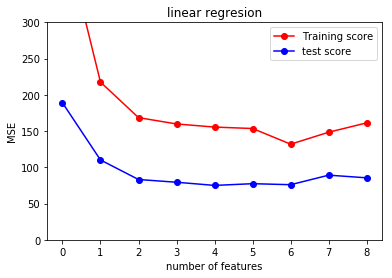

In [2872]:
plt.plot(np.arange(len(train_conc_mse)), train_conc_mse,'o-', color="r", label="Training score")
plt.plot(np.arange(len(test_conc_mse)), test_conc_mse, 'o-', color="b", label="test score")
plt.title("linear regresion")
plt.legend(loc="best")
plt.xlabel("number of features")
plt.ylabel("MSE")
plt.ylim(0,300)

In [2834]:
train_conc_mse = []
test_conc_mse = []

In [2843]:

lin = GradientBoostingRegressor(learning_rate=0.05, max_depth= 3, min_samples_leaf= 3,n_estimators=50000)
lin.fit(x17,y_train)
pred = lin.predict(t17)
train_conc_mse.append(mean_squared_error(y_test, pred))
pred_final = lin.predict(f17)
test_conc_mse.append(mean_squared_error(y_final, pred_final))

(0, 400)

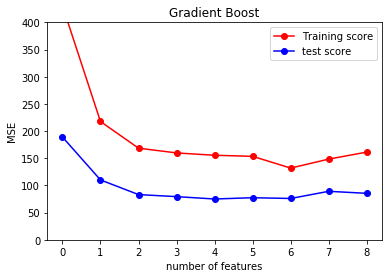

In [2868]:
plt.plot(np.arange(len(train_conc_mse)), train_conc_mse,'o-', color="r", label="Training score")
plt.plot(np.arange(len(test_conc_mse)), test_conc_mse, 'o-', color="b", label="test score")
plt.title("Gradient Boost")
plt.legend(loc="best")
plt.xlabel("number of features")
plt.ylabel("MSE")
plt.ylim(0,400)

In [2859]:
mean_squared_error(y_final,p)

103.06341792700943

In [2861]:
test_conc_mse

[189.14759410297017,
 110.1731254060678,
 83.18449262331468,
 79.40902760442951,
 75.04443567876488,
 77.41018020487677,
 76.02178378862686,
 89.18962577181226,
 85.48929469188421]

In [2856]:
reg_1.head()

,"(std, )","(runs_per_match, 2016)",career_runs_match,career_age,consistency,"(runs_per_match, 2015)","(runs_per_match, 2014)","(runs_per_match, 2013)","(runs_per_match, 2012)","(runs_per_match, 2011)","(runs_per_match, 2010)","(runs_per_match, 2009)"
0,4.710363,2.0000,5.295040,8,25.205675,2.000000,2.000000,14.833333,3.200000,7.555556,5.571429,5.200000
1,6.496200,0.0000,1.022222,6,10.264334,0.000000,1.333333,1.800000,2.000000,0.000000,0.000000,1.000000
2,8.918249,42.9375,29.596583,8,60.557917,36.642857,30.384615,26.642857,24.538462,24.000000,15.857143,35.769231
3,3.498537,0.0000,17.355000,5,34.808326,14.400000,0.000000,17.200000,15.875000,0.000000,23.300000,16.000000
4,10.549238,32.7500,21.870094,7,39.676986,7.666667,23.769231,32.571429,27.500000,7.833333,21.000000,0.000000


In [2858]:
p = reg_1[('runs_per_match', 2016)]

In [2862]:
reg_1_train.head()

,"(std, )","(runs_per_match, 2015)",career_runs_match,career_age,consistency,"(runs_per_match, 2014)","(runs_per_match, 2013)","(runs_per_match, 2012)","(runs_per_match, 2011)","(runs_per_match, 2010)","(runs_per_match, 2009)","(runs_per_match, 2008)"
0,4.485665,2.000000,6.586706,8,26.365118,2.000000,14.833333,3.200000,7.555556,5.571429,5.200000,12.333333
1,7.694538,0.250000,3.250000,6,15.003085,0.000000,0.250000,5.500000,0.000000,11.500000,1.000000,1.000000
2,7.272664,36.642857,26.208562,8,55.308677,30.384615,26.642857,24.538462,24.000000,15.857143,35.769231,15.833333
3,9.528369,7.666667,20.056777,6,35.586995,23.769231,32.571429,27.500000,7.833333,21.000000,0.000000,0.000000
4,8.306411,41.538462,24.516265,7,46.020385,28.250000,27.111111,35.000000,17.142857,0.000000,20.571429,2.000000


In [2931]:
y_first

array([ 2.        ,  1.        , 42.9375    , 32.75      , 34.28571429,
       27.83333333,  5.375     , 22.7       , 49.88235294,  8.25      ,
       27.        ,  5.4       ,  1.        , 33.4       , 13.14285714,
        3.66666667, 18.5       , 16.        , 23.875     , 17.33333333,
       22.33333333, 14.        ,  1.        , 32.35714286,  9.        ,
       12.13333333, 22.54545455, 23.66666667, 10.46153846,  4.        ,
       17.7       ,  9.        ,  6.83333333,  6.8       ,  6.5       ,
       12.73333333, 34.92857143, 26.26666667, 29.47058824,  1.        ,
       26.5       , 26.6       , 11.93333333, 24.28571429, 12.6       ,
        0.        ,  4.5       , 60.8125    , 22.5       , 27.76923077,
       23.6       ,  3.        ])

In [2932]:
ohdi_y = reg_y.reset_index()

In [2933]:
ohdi_y.head()

,player_id,batsman_striker,age,runs_per_match
season,,,2016,2016
0,9,A Mishra,34,2.000000
1,12,A Nehra,37,1.000000
2,25,AB de Villiers,31,42.937500
3,37,AJ Finch,30,32.750000
4,41,AM Rahane,28,34.285714


In [2934]:
ohdi_y['p']=np.arange(len(ohdi_y))

In [2937]:
reg_1_train['p']=np.arange(len(reg_1_train))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [2881]:
ohdi_y.head()

,player_id,batsman_striker,age,runs_per_match,p
season,,,2017,2017,
0,6,A Mishra,35,8.166667,0
1,20,AB Dinda,32,7.000000,1
2,22,AB de Villiers,32,24.000000,2
3,28,AD Mathews,30,16.000000,3
4,34,AJ Finch,31,23.076923,4


In [2938]:
ohdi_x = reg_1_train.merge(ohdi_y, on=['p'])

/anaconda3/lib/python3.6/site-packages/pandas/core/reshape/merge.py:543: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)
/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3108: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [2939]:
ohdi_x = ohdi_x.sort_values('consistency')

In [2886]:
ohdi_x.head()

,"(std, )","(runs_per_match, 2016)",career_runs_match,career_age,consistency,"(runs_per_match, 2015)","(runs_per_match, 2014)","(runs_per_match, 2013)","(runs_per_match, 2012)","(runs_per_match, 2011)","(runs_per_match, 2010)","(runs_per_match, 2009)",p,"(player_id, )","(batsman_striker, )","(age, 2017)","(runs_per_match, 2017)"
41,14.283558,1.000000,1.277778,6,9.430350,2.0,2.333333,2.333333,0.000000,0.0,0.0,0.000000,41,352,S Nadeem,28,0.666667
1,6.496200,0.000000,1.022222,6,10.264334,0.0,1.333333,1.800000,2.000000,0.0,0.0,1.000000,1,20,AB Dinda,32,7.000000
45,22.292636,2.333333,2.566667,5,17.206120,0.0,2.500000,3.500000,4.500000,0.0,0.0,0.000000,45,387,SP Narine,29,16.000000
44,14.020072,0.000000,3.380952,7,17.765962,6.0,2.000000,1.500000,9.166667,4.0,1.0,0.000000,44,377,SL Malinga,34,3.500000
56,23.575234,3.000000,4.972222,6,20.220279,0.0,2.666667,0.000000,3.000000,10.5,8.0,2.666667,56,460,Z Khan,39,1.333333


In [2940]:
cons_mean = ohdi_x.consistency.mean()

In [2941]:
cons_mean

39.97979696501613

In [2943]:
upper_cons = ohdi_x[ohdi_x.consistency >= cons_mean]

In [2944]:
lower_cons = ohdi_x[ohdi_x.consistency < cons_mean]

In [2895]:
upper_cons.head()

,"(std, )","(runs_per_match, 2016)",career_runs_match,career_age,consistency,"(runs_per_match, 2015)","(runs_per_match, 2014)","(runs_per_match, 2013)","(runs_per_match, 2012)","(runs_per_match, 2011)","(runs_per_match, 2010)","(runs_per_match, 2009)",p,"(player_id, )","(batsman_striker, )","(age, 2017)","(runs_per_match, 2017)"
17,12.279544,17.900000,16.134545,5,40.162328,13.272727,34.500000,12.000000,3.000000,0.000000,0.000000,0.000000,17,143,GJ Maxwell,29,23.846154
53,9.551451,22.500000,19.285714,8,41.038071,19.153846,27.846154,23.333333,6.000000,34.000000,11.166667,10.285714,53,446,WP Saha,33,21.272727
18,3.715048,13.142857,10.644889,8,41.883917,13.000000,4.000000,8.923077,9.818182,12.875000,15.000000,8.400000,18,151,Harbhajan Singh,37,2.285714
46,16.600563,38.571429,26.738095,5,42.638556,24.833333,21.714286,22.714286,25.857143,0.000000,0.000000,0.000000,46,388,SPD Smith,28,31.466667
32,7.751244,10.461538,15.738841,8,44.513159,12.454545,23.200000,4.500000,15.937500,11.428571,26.928571,21.000000,32,280,NV Ojha,34,15.800000


In [2945]:
upper_cons_x = upper_cons.drop(['p',('player_id', ''), ('batsman_striker', ''), ('age', 2016), ('runs_per_match', 2016)], axis=1)

In [2946]:
upper_cons_y = upper_cons[('runs_per_match', 2016)]

# running on only upper consistent group

In [3253]:
X_train, X_test, y_train, y_test = train_test_split(upper_cons_x.values,upper_cons_y.values)


In [3254]:
lr = LinearRegression()


In [3255]:
lr.fit(X_train[:,:6], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [3256]:
prediction = lr.predict(X_test[:,:6])

In [3257]:
mean_squared_error(y_test, prediction)

81.24786239896409

In [ ]:
i divided players by if there consisitency is higher that mean of consistency for all players. 

                    above mean consistency+other previously selected  features|  consitency +other previously selected  features
LinearRegression    40.1                                                      | 102
GBoost              79.9                                                      | 105

In [3219]:
len(X_first)

52

In [3218]:
len(upper_cons_x.values)

30

In [3203]:
X_train, X_test, y_train, y_test = train_test_split(upper_cons_x.values,upper_cons_y.values)


In [3204]:
l = GradientBoostingRegressor()


In [3205]:
l.fit(X_train[:,:6], y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [3206]:
prediction = l.predict(X_test[:,:6])

In [3207]:
mean_squared_error(y_test, prediction)

79.86236902725344

## running on all of them with consistency

In [3208]:
X_train, X_test, y_train, y_test = train_test_split(X_first,y_first)


In [3209]:
l = LinearRegression()


In [3210]:
l.fit(X_train[:,:6], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [3211]:
prediction = l.predict(X_test[:,:6])

In [3212]:
mean_squared_error(y_test, prediction)

102.71320520674539

In [3213]:
X_train, X_test, y_train, y_test = train_test_split(X_first,y_first)


In [3214]:
l = GradientBoostingRegressor()


In [3215]:
l.fit(X_train[:,:6], y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [3216]:
prediction = l.predict(X_test[:,:6])

In [3217]:
mean_squared_error(y_test, prediction)

105.1583131242806

In [3263]:
y_pr = reg_1_train[('runs_per_match', 2015)].values

In [3264]:
mean_squared_error(y_first,y_pr )

90.95811323917272

In [3269]:
len(train.batsman_striker.unique())

435

In [3463]:
train, test = train_and_test(2016, 2016)

/Users/panesar47/galvanize/Performance-predictor-IPL/src/feature_extraction.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['ball']=1
/Users/panesar47/galvanize/Performance-predictor-IPL/src/train_test.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['ball']=1


In [3464]:
reg_X = train.copy()

In [3355]:
### drop all duplicates like brandon mccullum and ganguly!!

In [3356]:
## counting seasonns for player and keeping only 5 or more

In [3357]:
reg_X = reg_X[reg_X.season!=2016]

In [3358]:
reg_X = reg_X[reg_X.season!=2017]

In [2763]:
reg_X = reg_X[reg_X.season!=2008]

In [3465]:
reg_X = reg_X.drop_duplicates()

reg_X = reg_X.sort_values(['player_id', 'season'])

reg_X = reg_X[reg_X.batsman_striker != 'BB McCullum']

from collections import Counter
cnt = Counter()

In [3466]:
# settign up counter to count seasons for each [erson]

In [3467]:
for player in reg_X.batsman_striker:
    cnt[player] += 1

    
    

a = pd.DataFrame.from_dict(cnt, orient = 'index').reset_index()

a = a.sort_values(0, ascending=False).reset_index()

a = a.rename(columns={'level_0':'player_id', 'index':'batsman_striker', 0:'seasons_played'})

a.drop('player_id',axis= 1 ,inplace= True)

reg_X = pd.merge(reg_X, a, on= 'batsman_striker', how='outer')
#reg_X['total_seasons_played']= reg_X['seasons_played']-1








In [3468]:
reg_X['total_seasons_played']= reg_X['seasons_played']-1


reg_X.drop(columns='seasons_played', axis=1, inplace=True)




In [3469]:
## keeps only batsman player 2016 and more that 5

In [3470]:
reg_X = reg_X[reg_X.total_seasons_played >= 5]

In [3471]:
## making sure to keep batsman just from 2016

In [3472]:
batin_y = reg_X[reg_X.season ==2016]

batin_y = batin_y[['batsman_striker']]

reg_X = reg_X.merge(batin_y, on='batsman_striker')

In [3473]:
len(batin_y)

52

In [3474]:
reg_y = reg_X[reg_X.season == 2016]

reg_X = reg_X[reg_X.season != 2016]

In [3475]:
#calculating runs per match

In [3476]:
reg_X.head(10)

,batsman_striker,player_id,season,ball,matches,runs_scored,total_outs,highest_score,Average,strike_rate,Average_1st_innings,strike_rate_1st_innings,Average_2nd_innings,strike_rate_2nd_innings,toss_win_count,30+,50+,75+,number_of_zeros,DOB,Bowling_skill,Australia,Bangladesh,England,India,Netherlands,New Zealand,Pakistan,South Africa,Sri Lanka,West Indies,Zimbabwea,Right_hand_bat,age,total_seasons_played
0,A Mishra,6,2008,42,3,37,3.0,31,12.33,88.10,4.00,80.00,16.50,89.19,1.0,1.0,0.0,0.0,0.0,11/24/1982,Legbreak,0,0,0,1,0,0,0,0,0,0,0,1,26,8
1,A Mishra,6,2009,20,5,26,3.0,13,8.67,130.00,0.67,25.00,0.00,200.00,3.0,0.0,0.0,0.0,2.0,11/24/1982,Legbreak,0,0,0,1,0,0,0,0,0,0,0,1,27,8
2,A Mishra,6,2010,54,7,39,4.0,12,9.75,72.22,0.00,106.67,5.75,58.97,3.0,0.0,0.0,0.0,1.0,11/24/1982,Legbreak,0,0,0,1,0,0,0,0,0,0,0,1,28,8
3,A Mishra,6,2011,52,9,68,4.0,25,17.00,130.77,6.67,166.67,48.00,120.00,4.0,0.0,0.0,0.0,3.0,11/24/1982,Legbreak,0,0,0,1,0,0,0,0,0,0,0,1,29,8
4,A Mishra,6,2012,21,5,16,3.0,8,5.33,76.19,2.67,50.00,0.00,160.00,3.0,0.0,0.0,0.0,1.0,11/24/1982,Legbreak,0,0,0,1,0,0,0,0,0,0,0,1,30,8
5,A Mishra,6,2013,103,6,89,6.0,30,14.83,86.41,16.50,82.50,11.50,100.00,3.0,1.0,0.0,0.0,0.0,11/24/1982,Legbreak,0,0,0,1,0,0,0,0,0,0,0,1,31,8
6,A Mishra,6,2014,7,2,4,1.0,4,4.00,57.14,0.00,0.00,0.00,80.00,1.0,0.0,0.0,0.0,1.0,11/24/1982,Legbreak,0,0,0,1,0,0,0,0,0,0,0,1,32,8
7,A Mishra,6,2015,13,4,8,2.0,4,4.00,61.54,3.00,60.00,5.00,62.50,2.0,0.0,0.0,0.0,0.0,11/24/1982,Legbreak,0,0,0,1,0,0,0,0,0,0,0,1,33,8
9,A Nehra,9,2008,13,3,3,1.0,2,3.00,23.08,0.00,0.00,3.00,23.08,3.0,0.0,0.0,0.0,1.0,4/29/1979,Left-arm medium-fast,0,0,0,1,0,0,0,0,0,0,0,1,29,6
10,A Nehra,9,2009,1,1,1,0.0,1,0.00,100.00,0.00,100.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,4/29/1979,Left-arm medium-fast,0,0,0,1,0,0,0,0,0,0,0,1,30,6


In [3477]:
reg_y.head()

,batsman_striker,player_id,season,ball,matches,runs_scored,total_outs,highest_score,Average,strike_rate,Average_1st_innings,strike_rate_1st_innings,Average_2nd_innings,strike_rate_2nd_innings,toss_win_count,30+,50+,75+,number_of_zeros,DOB,Bowling_skill,Australia,Bangladesh,England,India,Netherlands,New Zealand,Pakistan,South Africa,Sri Lanka,West Indies,Zimbabwea,Right_hand_bat,age,total_seasons_played
8,A Mishra,6,2016,14,2,4,2.0,3,2.00,28.57,3.00,33.33,1.00,20.00,1.0,0.0,0.0,0.0,0.0,11/24/1982,Legbreak,0,0,0,1,0,0,0,0,0,0,0,1,34,8
15,A Nehra,9,2016,1,1,1,0.0,1,0.00,100.00,0.00,100.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,4/29/1979,Left-arm medium-fast,0,0,0,1,0,0,0,0,0,0,0,1,37,6
24,AB de Villiers,22,2016,415,16,687,13.0,129,52.85,165.54,54.44,172.54,49.25,150.38,6.0,1.0,3.0,4.0,1.0,2/17/1984,Right-arm medium,0,0,0,0,0,0,0,1,0,0,0,1,31,8
31,AJ Finch,34,2016,311,12,393,10.0,74,39.30,126.37,27.50,120.88,47.17,128.64,6.0,1.0,4.0,0.0,2.0,11/17/1986,Slow left-arm orthodox,1,0,0,0,0,0,0,0,0,0,0,1,30,6
39,AM Rahane,38,2016,387,14,480,11.0,74,43.64,124.03,32.86,122.34,62.50,125.63,7.0,1.0,5.0,0.0,2.0,6/6/1988,Right-arm medium,0,0,0,1,0,0,0,0,0,0,0,1,28,7


In [3478]:
average_upto_2015= (reg_X.groupby(['batsman_striker', 'season','total_seasons_played']).sum()).reset_index()

In [3479]:
average_upto_2015['runs_per_match_avg'] = average_upto_2015['runs_scored']/average_upto_2015['matches']

In [3480]:
average_upto_2015.head()

,batsman_striker,season,total_seasons_played,player_id,ball,matches,runs_scored,total_outs,highest_score,Average,strike_rate,Average_1st_innings,strike_rate_1st_innings,Average_2nd_innings,strike_rate_2nd_innings,toss_win_count,30+,50+,75+,number_of_zeros,Australia,Bangladesh,England,India,Netherlands,New Zealand,Pakistan,South Africa,Sri Lanka,West Indies,Zimbabwea,Right_hand_bat,age,runs_per_match_avg
0,A Mishra,2008,8,6,42,3,37,3.0,31,12.33,88.10,4.00,80.00,16.50,89.19,1.0,1.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,1,26,12.333333
1,A Mishra,2009,8,6,20,5,26,3.0,13,8.67,130.00,0.67,25.00,0.00,200.00,3.0,0.0,0.0,0.0,2.0,0,0,0,1,0,0,0,0,0,0,0,1,27,5.200000
2,A Mishra,2010,8,6,54,7,39,4.0,12,9.75,72.22,0.00,106.67,5.75,58.97,3.0,0.0,0.0,0.0,1.0,0,0,0,1,0,0,0,0,0,0,0,1,28,5.571429
3,A Mishra,2011,8,6,52,9,68,4.0,25,17.00,130.77,6.67,166.67,48.00,120.00,4.0,0.0,0.0,0.0,3.0,0,0,0,1,0,0,0,0,0,0,0,1,29,7.555556
4,A Mishra,2012,8,6,21,5,16,3.0,8,5.33,76.19,2.67,50.00,0.00,160.00,3.0,0.0,0.0,0.0,1.0,0,0,0,1,0,0,0,0,0,0,0,1,30,3.200000


In [3481]:
# calculating averge runs per match for whole career (runspermatchavg / seasons)

In [3484]:
average_upto_2015= (average_upto_2015.groupby(['batsman_striker','total_seasons_played']).sum()).reset_index()

average_upto_2015['career_runs_match']= average_upto_2015['runs_per_match_avg']/ average_upto_2015['total_seasons_played']

average_upto_2015 = average_upto_2015.rename(columns={'total_seasons_played':'career_age'})

## consistency upto 2015

In [3486]:
average_upto_2015['SR'] = (average_upto_2015['runs_scored']  / average_upto_2015['ball'])*100

average_upto_2015['consistency'] = 0.4262*average_upto_2015.career_runs_match + 0.2566*average_upto_2015.matches + 0.1510*average_upto_2015.SR + 0.0787*average_upto_2015['75+']+0.0556*average_upto_2015['50+'] - 0.0328*average_upto_2015.total_outs

In [3487]:
average_upto_2015.head()

,batsman_striker,career_age,season,player_id,ball,matches,runs_scored,total_outs,highest_score,Average,strike_rate,Average_1st_innings,strike_rate_1st_innings,Average_2nd_innings,strike_rate_2nd_innings,toss_win_count,30+,50+,75+,number_of_zeros,Australia,Bangladesh,England,India,Netherlands,New Zealand,Pakistan,South Africa,Sri Lanka,West Indies,Zimbabwea,Right_hand_bat,age,runs_per_match_avg,career_runs_match,SR,consistency
0,A Mishra,8,16092,48,312,41,287,26.0,127,75.91,702.37,33.51,570.84,86.75,870.66,20.0,2.0,0.0,0.0,8.0,0,0,0,8,0,0,0,0,0,0,0,8,236,52.693651,6.586706,91.987179,26.365118
1,A Nehra,6,12067,54,62,16,40,7.0,36,27.25,349.49,1.00,181.67,3.50,289.75,6.0,0.0,0.0,0.0,7.0,0,0,0,6,0,0,0,0,0,0,0,6,193,19.500000,3.250000,64.516129,15.003085
2,AB de Villiers,8,16092,176,1816,93,2583,70.0,591,280.93,1087.53,356.60,1171.21,227.59,987.60,43.0,16.0,14.0,4.0,7.0,0,0,0,0,0,0,0,8,0,0,0,8,212,209.668498,26.208562,142.235683,55.308677
3,AJ Finch,6,12075,204,769,39,911,37.0,241,124.66,615.49,117.00,502.40,78.75,544.35,23.0,5.0,5.0,1.0,3.0,6,0,0,0,0,0,0,0,0,0,0,6,159,120.340659,20.056777,118.465540,35.586995
4,AM Rahane,7,14082,266,1887,75,2195,65.0,452,198.20,724.57,204.54,718.86,200.18,646.21,41.0,11.0,9.0,5.0,6.0,0,0,0,7,0,0,0,0,0,0,0,7,166,171.613858,24.516265,116.322205,46.020385


In [3488]:
average_upto_2015 = average_upto_2015[['batsman_striker', 'career_runs_match', 'career_age','consistency']]

In [3489]:
#making  y  matric

In [3490]:
reg_y.head()

,batsman_striker,player_id,season,ball,matches,runs_scored,total_outs,highest_score,Average,strike_rate,Average_1st_innings,strike_rate_1st_innings,Average_2nd_innings,strike_rate_2nd_innings,toss_win_count,30+,50+,75+,number_of_zeros,DOB,Bowling_skill,Australia,Bangladesh,England,India,Netherlands,New Zealand,Pakistan,South Africa,Sri Lanka,West Indies,Zimbabwea,Right_hand_bat,age,total_seasons_played
8,A Mishra,6,2016,14,2,4,2.0,3,2.00,28.57,3.00,33.33,1.00,20.00,1.0,0.0,0.0,0.0,0.0,11/24/1982,Legbreak,0,0,0,1,0,0,0,0,0,0,0,1,34,8
15,A Nehra,9,2016,1,1,1,0.0,1,0.00,100.00,0.00,100.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,4/29/1979,Left-arm medium-fast,0,0,0,1,0,0,0,0,0,0,0,1,37,6
24,AB de Villiers,22,2016,415,16,687,13.0,129,52.85,165.54,54.44,172.54,49.25,150.38,6.0,1.0,3.0,4.0,1.0,2/17/1984,Right-arm medium,0,0,0,0,0,0,0,1,0,0,0,1,31,8
31,AJ Finch,34,2016,311,12,393,10.0,74,39.30,126.37,27.50,120.88,47.17,128.64,6.0,1.0,4.0,0.0,2.0,11/17/1986,Slow left-arm orthodox,1,0,0,0,0,0,0,0,0,0,0,1,30,6
39,AM Rahane,38,2016,387,14,480,11.0,74,43.64,124.03,32.86,122.34,62.50,125.63,7.0,1.0,5.0,0.0,2.0,6/6/1988,Right-arm medium,0,0,0,1,0,0,0,0,0,0,0,1,28,7


In [3491]:
reg_y = (reg_y.groupby(['player_id', 'batsman_striker', 'season']).sum()).reset_index()

reg_y['runs_per_match']= reg_y['runs_scored'] / reg_y['matches']

reg_y = reg_y[['player_id', 'batsman_striker', 'season', 'age', 'runs_per_match']]

reg_y = (reg_y.pivot_table(index=['player_id', 'batsman_striker'], columns=['season'], values=['runs_per_match', 'age']))

#reg_y.reset_index()



In [3492]:
len(y_trial)

50

In [3494]:
y_trial = reg_y[('runs_per_match',2015)].values

In [3495]:
reg_y.head()

,,age,runs_per_match
,season,2016,2016
player_id,batsman_striker,,
6,A Mishra,34,2.000000
9,A Nehra,37,1.000000
22,AB de Villiers,31,42.937500
34,AJ Finch,30,32.750000
38,AM Rahane,28,34.285714


In [2784]:
y_final = reg_y[('runs_per_match',2017)].values

In [3496]:
y_first = reg_y[('runs_per_match',2016)].values

In [2753]:
#making X matrics

In [3389]:
len(reg_x)

50

In [3497]:
reg_x = (reg_X.groupby(['player_id', 'batsman_striker', 'season']).sum()).reset_index()

reg_x['runs_per_match']= reg_x['runs_scored'] / reg_x['matches']

reg_x = reg_x[['player_id', 'batsman_striker', 'season', 'age', 'runs_per_match']]

reg_x = (reg_x.pivot_table(index=['player_id', 'batsman_striker'], columns=['season'], values=['runs_per_match', 'age']))
reg_x = reg_x.reset_index()



In [2713]:
# next steps without std columns

In [2714]:
# reg_x = reg_x.merge(average_upto_2015, on=['batsman_striker'], how='outer')

# reg_x = reg_x.fillna('')




# reg_y = reg_y.sort_values('player_id', ascending=True)

# reg_x = reg_x.sort_values(('player_id', ''), ascending=True)

# reg_x.drop(('batsman_striker', ''), axis=1, inplace=True)

# reg_x.drop('batsman_striker', axis=1, inplace=True)

# made the standard devoation, merge it into x

In [2715]:
# gave mean to their missing value for the seasons!

In [2716]:
reg_x_std.head()

,player_id,batsman_striker,std
season,,,
0,7,A Mishra,4.485665
1,10,A Nehra,7.662448
2,23,AB de Villiers,7.272664
3,35,AJ Finch,9.523568
4,39,AM Rahane,8.309997


In [2503]:
reg_x.head()

,"(player_id, )","(age, 2009)","(age, 2010)","(age, 2011)","(age, 2012)","(age, 2013)","(age, 2014)","(age, 2015)","(age, 2016)","(runs_per_match, 2009)","(runs_per_match, 2010)","(runs_per_match, 2011)","(runs_per_match, 2012)","(runs_per_match, 2013)","(runs_per_match, 2014)","(runs_per_match, 2015)","(runs_per_match, 2016)","(std, )",career_runs_match,career_age
0,8,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,5.200000,5.571429,7.555556,3.200000,14.833333,2.000000,2.000000,2.0000,4.485665,5.295040,8
1,22,24.0,25.0,26.0,27.0,28.0,29.0,0.0,0.0,1.000000,0.000000,0.000000,2.000000,1.800000,1.333333,0.000000,0.0000,5.115810,1.022222,6
2,24,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,35.769231,15.857143,24.000000,24.538462,26.642857,30.384615,36.642857,42.9375,7.272664,29.596583,8
3,30,22.0,23.0,0.0,25.0,26.0,0.0,28.0,0.0,16.000000,23.300000,0.000000,15.875000,17.200000,0.000000,14.400000,0.0000,3.593702,17.355000,5
4,36,0.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,0.000000,21.000000,7.833333,27.500000,32.571429,23.769231,7.666667,32.7500,9.594656,21.870094,7


In [3498]:
#trial
#reg_x_std = reg_x.drop([('age', 2008),('age', 2009),('age', 2010),('age', 2011),('age', 2012),('age', 2013),('age', 2014)],axis =1 )


#train#
reg_x_std = reg_x.drop([('age', 2009),('age', 2010),('age', 2011),('age', 2012),('age', 2013),('age', 2014),('age', 2015)],axis =1 )

#test
#reg_x_std = reg_x.drop([('age', 2009),('age', 2010),('age', 2011),('age', 2012),('age', 2013),('age', 2014),('age', 2015),('age', 2016)],axis =1 )

reg_x_std = reg_x_std.T.fillna(reg_x.mean(axis=1)).T


l = []
for i in range(len(reg_x_std)):
    l.append(stats.tstd(reg_x_std.iloc[i][3:10]))
reg_x_std['std']= l

reg_x_std = reg_x_std[['player_id', 'batsman_striker', 'std']]

reg_x= reg_x.merge(reg_x_std, on=['batsman_striker'])

reg_x = reg_x.rename(columns={'player_id_x': 'player_id'}).drop('player_id_y', axis=1)

/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3108: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [3499]:
len(reg_x)

52

In [3500]:
reg_x = reg_x.merge(average_upto_2015, on=['batsman_striker'], how='outer')

reg_x = reg_x.fillna(0)




reg_y = reg_y.sort_values('player_id', ascending=True)

reg_x = reg_x.sort_values(('player_id', ''), ascending=True)
reg_x.drop(('batsman_striker', ''), axis=1, inplace=True)

reg_x.drop('batsman_striker', axis=1, inplace=True)

/anaconda3/lib/python3.6/site-packages/pandas/core/reshape/merge.py:543: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


In [3395]:
len(reg_1_trial)

50

In [3420]:
reg_1_trial = reg_x[[('std', ''),'career_runs_match','career_age',('consistency'),('runs_per_match', 2014),('runs_per_match', 2013),('runs_per_match', 2012),('runs_per_match', 2011),('runs_per_match', 2010),('runs_per_match', 2009),('runs_per_match', 2008)]]

In [ ]:
# train

In [3501]:
reg_1_train = reg_x[[('std', ''),('runs_per_match', 2015),'career_runs_match','career_age',('consistency'),('runs_per_match', 2014),('runs_per_match', 2013),('runs_per_match', 2012),('runs_per_match', 2011),('runs_per_match', 2010),('runs_per_match', 2009)]]

In [2788]:
#test

reg_1 = reg_x[[('std', ''),('runs_per_match', 2016),'career_runs_match','career_age',('consistency'),('runs_per_match', 2015),('runs_per_match', 2014),('runs_per_match', 2013),('runs_per_match', 2012),('runs_per_match', 2011),('runs_per_match', 2010),('runs_per_match', 2009)]]

In [3308]:
len(X_trial)

50

In [3502]:
len(y_trial)

52

In [3348]:
len(reg_1_trial.values)

50

In [3349]:
len(y)

57

In [3421]:
X_trial = reg_1_trial.values
y_trial = y_trial

In [3503]:
X_first = reg_1_train.values
y_first = y_first

In [2789]:
X_final = reg_1.values

y_final = y

In [2636]:
reg_1.head()

,"(std, )","(runs_per_match, 2015)",career_runs_match,career_age,consistency,"(runs_per_match, 2014)","(runs_per_match, 2013)","(runs_per_match, 2012)","(runs_per_match, 2011)","(runs_per_match, 2010)","(runs_per_match, 2009)"
0,4.710363,2.000000,5.295040,8,25.205675,2.000000,14.833333,3.200000,7.555556,5.571429,5.200000
1,6.607981,0.000000,1.022222,6,10.264334,1.333333,1.800000,2.000000,0.000000,0.000000,1.000000
2,8.918249,36.642857,29.596583,8,60.557917,30.384615,26.642857,24.538462,24.000000,15.857143,35.769231
3,3.589767,14.400000,17.355000,5,34.808326,0.000000,17.200000,15.875000,0.000000,23.300000,16.000000
4,10.549238,7.666667,21.870094,7,39.676986,23.769231,32.571429,27.500000,7.833333,21.000000,0.000000


In [2790]:
X_train, X_test, y_train, y_test = train_test_split(X_first,y_first)


In [ ]:
# train

In [2928]:
reg_1_train = reg_x[[('std', ''),('runs_per_match', 2015),'career_runs_match','career_age',('consistency'),('runs_per_match', 2014),('runs_per_match', 2013),('runs_per_match', 2012),('runs_per_match', 2011),('runs_per_match', 2010),('runs_per_match', 2009),('runs_per_match', 2008)]]

In [2788]:
#test

reg_1 = reg_x[[('std', ''),('runs_per_match', 2016),'career_runs_match','career_age',('consistency'),('runs_per_match', 2015),('runs_per_match', 2014),('runs_per_match', 2013),('runs_per_match', 2012),('runs_per_match', 2011),('runs_per_match', 2010),('runs_per_match', 2009)]]

In [2929]:
X_first = reg_1_train.values
y_first = y_first

In [2789]:
X_final = reg_1.values

y_final = y

In [2566]:
reg_x.descr

,"(player_id, )","(age, 2008)","(age, 2009)","(age, 2010)","(age, 2011)","(age, 2012)","(age, 2013)","(age, 2014)","(age, 2015)","(runs_per_match, 2008)","(runs_per_match, 2009)","(runs_per_match, 2010)","(runs_per_match, 2011)","(runs_per_match, 2012)","(runs_per_match, 2013)","(runs_per_match, 2014)","(runs_per_match, 2015)","(std, )",career_runs_match,career_age,consistency
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,244.480769,15.576923,18.615385,22.365385,24.461538,25.500000,26.346154,27.423077,28.750000,11.237519,11.905546,15.052738,15.920438,16.122814,17.825155,16.257468,17.638050,8.315394,17.036506,7.000000,39.979797
std,134.310803,11.731216,11.167449,9.303233,6.952109,7.212462,7.356162,7.585709,6.682946,13.003477,11.329696,11.079471,12.064244,12.083256,11.321148,11.738325,11.896281,4.868529,9.559402,1.047874,13.791731
min,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.079869,1.333333,5.000000,9.445249
25%,136.250000,0.000000,15.000000,22.750000,23.000000,24.000000,25.000000,26.000000,27.000000,0.000000,0.000000,5.300000,6.732143,5.375000,8.442308,4.375000,7.702381,4.522967,6.540699,6.000000,29.272943
50%,244.500000,20.500000,23.000000,25.000000,26.000000,27.000000,28.000000,29.000000,30.000000,7.791667,9.050000,15.528571,13.629808,15.913194,17.916667,17.291667,18.913462,7.491974,17.073617,7.000000,42.196405
75%,349.250000,25.000000,26.000000,27.000000,28.000000,29.000000,30.000000,31.000000,32.000000,18.933036,21.200000,24.151786,25.331818,24.731971,26.898246,25.678571,25.410714,10.380322,24.735116,8.000000,50.728007
max,461.000000,30.000000,31.000000,32.000000,33.000000,34.000000,34.000000,36.000000,36.000000,56.000000,42.000000,37.000000,50.666667,52.357143,45.000000,41.250000,41.538462,23.422077,37.657596,8.000000,63.727018


In [2576]:
reg_1.head()

,"(std, )","(runs_per_match, 2015)",career_runs_match,career_age,consistency,"(runs_per_match, 2014)","(runs_per_match, 2013)","(runs_per_match, 2012)","(runs_per_match, 2011)","(runs_per_match, 2010)","(runs_per_match, 2009)","(runs_per_match, 2008)"
0,4.485665,2.000000,6.586706,8,26.365118,2.000000,14.833333,3.200000,7.555556,5.571429,5.200000,12.333333
1,7.662448,0.250000,3.250000,6,15.003085,0.000000,0.250000,5.500000,0.000000,11.500000,1.000000,1.000000
2,7.272664,36.642857,26.208562,8,55.308677,30.384615,26.642857,24.538462,24.000000,15.857143,35.769231,15.833333
3,9.523568,7.666667,20.056777,6,35.586995,23.769231,32.571429,27.500000,7.833333,21.000000,0.000000,0.000000
4,8.309997,41.538462,24.516265,7,46.020385,28.250000,27.111111,35.000000,17.142857,0.000000,20.571429,2.000000


In [2636]:
reg_1.head()

,"(std, )","(runs_per_match, 2015)",career_runs_match,career_age,consistency,"(runs_per_match, 2014)","(runs_per_match, 2013)","(runs_per_match, 2012)","(runs_per_match, 2011)","(runs_per_match, 2010)","(runs_per_match, 2009)"
0,4.710363,2.000000,5.295040,8,25.205675,2.000000,14.833333,3.200000,7.555556,5.571429,5.200000
1,6.607981,0.000000,1.022222,6,10.264334,1.333333,1.800000,2.000000,0.000000,0.000000,1.000000
2,8.918249,36.642857,29.596583,8,60.557917,30.384615,26.642857,24.538462,24.000000,15.857143,35.769231
3,3.589767,14.400000,17.355000,5,34.808326,0.000000,17.200000,15.875000,0.000000,23.300000,16.000000
4,10.549238,7.666667,21.870094,7,39.676986,23.769231,32.571429,27.500000,7.833333,21.000000,0.000000


In [3505]:
l = LinearRegression()

In [3506]:
l.fit(X_trial, y_trial)

ValueError: Found input variables with inconsistent numbers of samples: [50, 52]

In [3504]:
y_pr = l.predict(X_first)

AttributeError: 'list' object has no attribute 'predict'

In [3415]:
X_first.shape

(52, 12)

In [3416]:
X_trial.shape


/anaconda3/lib/python3.6/site-packages/IPython/core/displayhook.py:271: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  'Flushing oldest {cull_count} entries.'.format(sz=sz, cull_count=cull_count))


(50, 11)

In [3418]:
reg_x.head()


,"(player_id, )","(age, 2008)","(age, 2009)","(age, 2010)","(age, 2011)","(age, 2012)","(age, 2013)","(age, 2014)","(runs_per_match, 2008)","(runs_per_match, 2009)","(runs_per_match, 2010)","(runs_per_match, 2011)","(runs_per_match, 2012)","(runs_per_match, 2013)","(runs_per_match, 2014)","(std, )",career_runs_match,career_age,consistency
0,8,26.0,27.0,28.0,29.0,30.0,31.0,32.0,12.333333,5.200000,5.571429,7.555556,3.200000,14.833333,2.000000,4.564706,7.241950,7,25.883486
1,11,29.0,30.0,31.0,0.0,33.0,34.0,0.0,1.000000,1.000000,11.500000,0.000000,5.500000,0.250000,0.000000,7.580324,3.850000,5,15.230543
2,24,23.0,24.0,25.0,26.0,27.0,28.0,29.0,15.833333,35.769231,15.857143,24.000000,24.538462,26.642857,30.384615,6.691079,24.717949,7,50.419600
3,36,0.0,0.0,24.0,25.0,26.0,27.0,28.0,0.000000,0.000000,21.000000,7.833333,27.500000,32.571429,23.769231,8.389628,22.534799,5,36.301909
4,40,20.0,21.0,0.0,23.0,24.0,25.0,26.0,2.000000,20.571429,0.000000,17.142857,35.000000,27.111111,28.250000,6.281657,21.679233,6,41.128603


In [3419]:
reg_1_train.head()

,"(std, )",career_runs_match,career_age,consistency,"(runs_per_match, 2014)","(runs_per_match, 2013)","(runs_per_match, 2012)","(runs_per_match, 2011)","(runs_per_match, 2010)","(runs_per_match, 2009)","(runs_per_match, 2008)"
0,4.564706,7.241950,7,25.883486,2.000000,14.833333,3.200000,7.555556,5.571429,5.200000,12.333333
1,7.540516,3.850000,5,15.230543,0.000000,0.250000,5.500000,0.000000,11.500000,1.000000,1.000000
2,6.691079,24.717949,7,50.419600,30.384615,26.642857,24.538462,24.000000,15.857143,35.769231,15.833333
3,8.384653,22.534799,5,36.301909,23.769231,32.571429,27.500000,7.833333,21.000000,0.000000,0.000000
4,6.285490,21.679233,6,41.128603,28.250000,27.111111,35.000000,17.142857,0.000000,20.571429,2.000000


In [3522]:
from models import train, validate, test

In [3526]:
X_train,y_train=train()

/Users/panesar47/galvanize/Performance-predictor-IPL/src/feature_extraction.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['ball']=1
/Users/panesar47/galvanize/Performance-predictor-IPL/src/train_test.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['ball']=1
/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3108: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
/anaconda3/lib/python3.6/s

In [3527]:
X_validate, y_validate = validate()

/Users/panesar47/galvanize/Performance-predictor-IPL/src/feature_extraction.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['ball']=1
/Users/panesar47/galvanize/Performance-predictor-IPL/src/train_test.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['ball']=1
/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3108: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
/anaconda3/lib/python3.6/s

In [3528]:
X_test, y_test = test()

/Users/panesar47/galvanize/Performance-predictor-IPL/src/feature_extraction.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['ball']=1
/Users/panesar47/galvanize/Performance-predictor-IPL/src/train_test.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['ball']=1
/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3108: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
/anaconda3/lib/python3.6/s

In [3833]:
lr = LinearRegression()

In [3834]:
lr.fit(X_train[:,:6], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [3835]:
predi = lr.predict(X_validate[:,:6])

In [3836]:
mean_squared_error(y_validate,predi)

70.27913821813387

Text(0.5,1,'2016 runs_per_match')

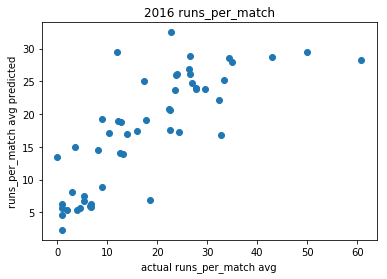

In [3837]:
plt.scatter(y_validate, predi)
plt.xlabel("actual runs_per_match avg")
plt.ylabel("runs_per_match avg predicted")
plt.title('2016 runs_per_match')

In [3541]:
X_validate.shape

(52, 11)

In [3545]:
predi_final = lr.predict(X_test[:,:6])

In [3546]:
mean_squared_error(y_test, predi_final)

64.76311004708717

Text(0.5,1,'2017 runs_per_match')

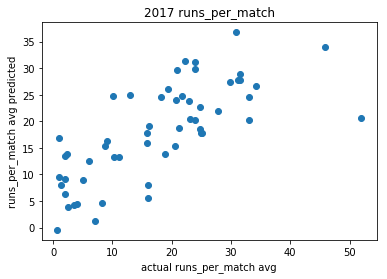

In [3550]:
plt.scatter(y_test, predi_final)
plt.xlabel("actual runs_per_match avg")
plt.ylabel("runs_per_match avg predicted")
plt.title('2017 runs_per_match')

In [3552]:
lr = GradientBoostingRegressor()

In [3553]:
lr.fit(X_train[:,:6], y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [3554]:
predi = lr.predict(X_validate[:,:6])

In [3555]:
mean_squared_error(y_validate,predi)

78.2990175345779

Text(0.5,1,'2017 runs_per_match, GB')

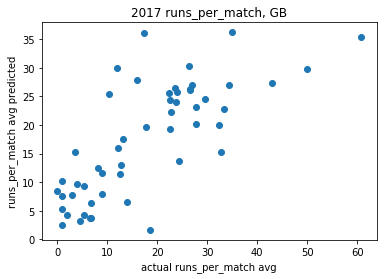

In [3561]:
plt.scatter(y_validate, predi)
plt.xlabel("actual runs_per_match avg")
plt.ylabel("runs_per_match avg predicted")
plt.title('2016 runs_per_match, GB')

In [3557]:
predi_final = lr.predict(X_test[:,:6])

In [3558]:
mean_squared_error(y_test, predi_final)

89.16026473165277

Text(0.5,1,'2017 runs_per_match, GB')

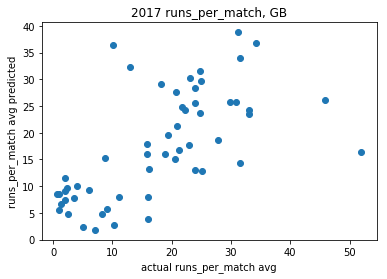

In [3560]:
plt.scatter(y_test, predi_final)
plt.xlabel("actual runs_per_match avg")
plt.ylabel("runs_per_match avg predicted")
plt.title('2017 runs_per_match, GB')

In [3562]:
lr = RandomForestRegressor()

In [3563]:
lr.fit(X_train[:,:6], y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [3564]:
predi = lr.predict(X_validate[:,:6])

In [3565]:
mean_squared_error(y_validate,predi)

65.924382451535

Text(0.5,1,'2016 runs_per_match, RF')

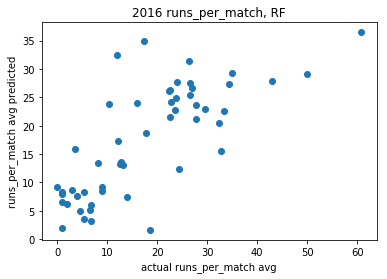

In [3832]:
plt.scatter(y_validate, predi)
plt.xlabel("actual runs_per_match avg")
plt.ylabel("runs_per_match avg predicted")
plt.title('2016 runs_per_match, RF')

In [3567]:
predi_final = lr.predict(X_test[:,:6])

In [3568]:
mean_squared_error(y_test, predi_final)

73.93545221823047

Text(0.5,1,'2017 runs_per_match, RF')

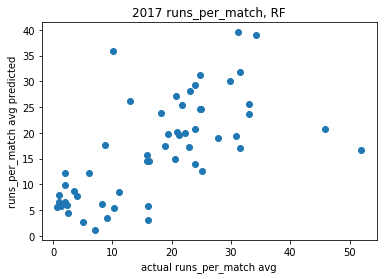

In [3605]:
plt.scatter(y_test, predi_final)
plt.xlabel("actual runs_per_match avg")
plt.ylabel("runs_per_match avg predicted")
plt.title('2017 runs_per_match, RF')

In [3575]:
from xgboost import XGBRegressor 

In [3576]:
lr = XGBRegressor()

In [3577]:
lr.fit(X_train[:,:6], y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [3578]:
predi = lr.predict(X_validate[:,:6])

In [3579]:
mean_squared_error(y_validate,predi)

77.27061013017932

Text(0.5,1,'2017 runs_per_match, XG')

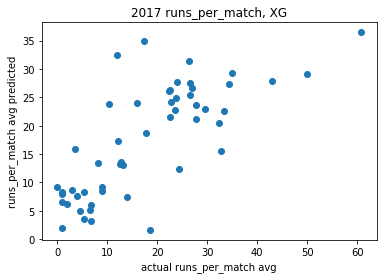

In [3586]:
plt.scatter(y_validate, predi)
plt.xlabel("actual runs_per_match avg")
plt.ylabel("runs_per_match avg predicted")
plt.title('2017 runs_per_match, XG')

In [3581]:
predi_final = lr.predict(X_test[:,:6])

In [3582]:
mean_squared_error(y_test, predi_final)

86.23218325830446

Text(0.5,1,'2017 runs_per_match, XG')

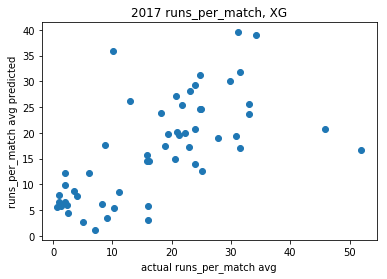

In [3585]:
plt.scatter(y_test, predi_final)
plt.xlabel("actual runs_per_match avg")
plt.ylabel("runs_per_match avg predicted")
plt.title('2017 runs_per_match, XG')

In [3584]:
from sklearn.model_selection import GridSearchCV

In [3631]:
grid_param = {  
    'n_estimators': [100,200,500, 800, 1000],
    'bootstrap': [True, False],
     'random_state': [10],
    'max_depth': [3, None]}

In [3632]:
rf_grd=GridSearchCV(estimator = RandomForestRegressor(), param_grid=grid_param, scoring='neg_mean_squared_error', cv =5, n_jobs=-1)

In [3633]:
rf_grd.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [100, 200, 500, 800, 1000], 'bootstrap': [True, False], 'random_state': [10], 'max_depth': [3, None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [3634]:
rf_grd.best_params_

{'bootstrap': True, 'max_depth': 3, 'n_estimators': 500, 'random_state': 10}

In [3635]:
rf_grd.best_score_

-68.13332919937989

In [3625]:
rf = RandomForestRegressor(n_estimators=500,max_depth=3,bootstrap='True',random_state=10)

In [3626]:
rf.fit(X_train[:,:6],y_train)

RandomForestRegressor(bootstrap='True', criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=10, verbose=0, warm_start=False)

In [3627]:
rfpr = rf.predict(X_validate[:,:6])

In [3628]:
mean_squared_error(y_validate, rfpr)

66.28048776508024

In [3637]:
gb_grid_params = {
    'n_estimators':  [1000,5000,10000,25000,50000,60000],
    'learning_rate': [0.1, 0.05, 0.02, 0.01],
              'max_depth': [4, 6, 8],
              'min_samples_leaf': [20, 50,100,150],
              #'max_features': [1.0, 0.3, 0.1] 
              }

gb_gs = GradientBoostingRegressor()


In [3640]:
GB_gs = GridSearchCV(gb_gs,
                        gb_grid_params,
                        cv=5,
                        scoring='neg_mean_squared_error', 
                        n_jobs=-1)

In [3641]:
GB_gs.fit(X_train,y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/m

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [1000, 5000, 10000, 25000, 50000, 60000], 'learning_rate': [0.1, 0.05, 0.02, 0.01], 'max_depth': [4, 6, 8], 'min_samples_leaf': [20, 50, 100, 150]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='mean_squared_error', verbose=0)

In [3642]:
GB_gs.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=20,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=1000, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [3643]:
GB_gs.best_params_

{'learning_rate': 0.01,
 'max_depth': 4,
 'min_samples_leaf': 20,
 'n_estimators': 1000}

In [3644]:
GB_gs.best_score_

-72.30416912076898

In [3658]:
Gboost= GradientBoostingRegressor(learning_rate= 0.01,
 max_depth=4,
 min_samples_leaf= 20,
 n_estimators= 1000)

In [3659]:
Gboost.fit(X_train[:,:6],y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=20,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=1000, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [3660]:
gpred = Gboost.predict(X_validate[:,:6])

In [3661]:
mean_squared_error(y_validate, gpred)

77.28455121662874

In [3662]:
gpred_final = Gboost.predict(X_test[:,:6])

In [3663]:
mean_squared_error(y_test, gpred_final)

65.63236890206204

In [3653]:
import statsmodels.api as sm


In [3719]:
simple_model = sm.OLS(y_train, sm.add_constant(X_train[:,:6]))
simple_results = simple_model.fit()
simple_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     9.970
Date:                Mon, 19 Nov 2018   Prob (F-statistic):           6.90e-07
Time:                        20:41:05   Log-Likelihood:                -169.79
No. Observations:                  50   AIC:                             353.6
Df Residuals:                      43   BIC:                             367.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.4782     12.469      0.439      0.663     -19.669      30.625
x1             0.0566      0.326      0.173      0.863      -0.601       0.715
x2             0.2979      0.424      0.702      0.486      -0.557       1.153
x3            -1.6610      2.059     -0.807      0.424      -5.812       2.490
x4             0.3603      0.259      1.390      0.172      -0.162       0.883
x5             0.1469      0.173      0.849      0.400      -0.202       0.496
x6             0.0351      0.193      0.182      0.857      -0.355       0.425
==============================================================================
Omnibus:                        0.716   Durbin-Watson:                   2.259
Prob(Omnibus):                  0.699   Jarque-Bera (JB):                0.541
Skew:                           0.251   Prob(JB):                        0.763
Kurtosis:                       2.914   Cond. No.                         633.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [3825]:
simple_model = sm.OLS(y_train, sm.add_constant(X_train[:,:3]))
simple_results = simple_model.fit()
simple_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.526
Method:                 Least Squares   F-statistic:                     19.16
Date:                Mon, 19 Nov 2018   Prob (F-statistic):           3.33e-08
Time:                        21:51:27   Log-Likelihood:                -171.32
No. Observations:                  50   AIC:                             350.6
Df Residuals:                      46   BIC:                             358.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6684     11.841      0.394      0.695     -19.167      28.503
x1            -0.0676      0.307     -0.220      0.827      -0.686       0.551
x2             0.8780      0.120      7.308      0.000       0.636       1.120
x3            -0.2703      1.704     -0.159      0.875      -3.700       3.159
==============================================================================
Omnibus:                        0.781   Durbin-Watson:                   2.262
Prob(Omnibus):                  0.677   Jarque-Bera (JB):                0.566
Skew:                           0.259   Prob(JB):                        0.753
Kurtosis:                       2.939   Cond. No.                         247.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [3665]:
simple_results.params


array([-1.55124534,  0.17419821, -0.12258876, -0.60029165,  0.33128072,
        0.19034764,  0.0513637 ,  0.31417627,  0.02346897,  0.04759503,
        0.09858854, -0.07511038])

In [3729]:
X_validate.shape

(52, 11)

In [3740]:
lin = LinearRegression()

In [3743]:
lin.fit(X_train[:,:6], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [3745]:
lp = lin.predict(X_validate[:,:6])

In [3746]:
mean_squared_error(y_validate,lp)

70.27913821813387

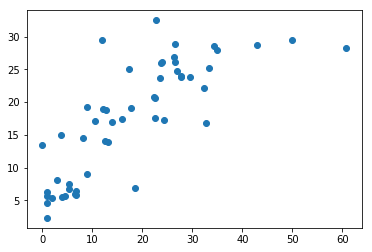

In [3749]:
plt.scatter(y_validate, lp)

In [3750]:
from seaborn import residplot

In [3754]:
 resid = y_validate - lp

Text(0,0.5,'standardized Residual')

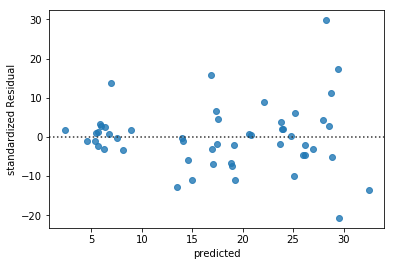

In [3757]:
residplot(lp, resid)
plt.xlabel('predicted')
plt.ylabel('standardized Residual')

In [3821]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variance_inflation_factor(X_train[:,1],1)


IndexError: tuple index out of range

In [3764]:
X_train[:,1]

array([ 7.24195011,  3.85      , 24.71794872, 22.53479853, 21.6792328 ,
       23.15369048, 38.08862434, 28.19740676, 14.51777211, 23.81730769,
        6.9       ,  4.17261905, 27.54565326,  9.85946553,  2.7       ,
       13.80584416, 26.06507937, 18.64      , 21.2692411 ,  5.83333333,
       23.02044483, 33.74017663, 21.55244854, 17.9390768 , 17.56857143,
       26.55721124, 12.99428571, 17.16577381,  5.05187075, 18.34462759,
        8.0712585 ,  5.6       ,  7.20068027,  7.31734694, 17.31260684,
       27.36219154, 25.28973705, 25.4170068 , 38.31089744, 30.12417467,
        2.94444444, 31.29263584, 15.86359751, 14.19886364,  2.31904762,
       25.84971219, 27.33836279, 18.36169545, 21.97117763, 22.61538462])

In [3786]:
from statsmodels.stats.outliers_influence import variance_inflation_factor    

def calculate_vif_(X, thresh=10):
    cols = X.columns
    variables = np.arange(X.shape[1])
    dropped=True
    while dropped:
        dropped=False
        c = X[cols[variables]].values
        vif = [variance_inflation_factor(c, ix) for ix in np.arange(c.shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X[cols[variables]].columns[maxloc] + '\' at index: ' + str(maxloc))
            variables = np.delete(variables, maxloc)
            dropped=True

    print('Remaining variables:')
    print(X.columns[variables])
    return X[cols[variables]]

In [3791]:
calculate_vif_(ok)

TypeError: must be str, not int

In [3790]:
ok = pd.DataFrame(X_train,columns=['a','b','c','d','e','f','g','h','i','j','k'])

In [3820]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(ok.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

IndexError: index 11 is out of bounds for axis 1 with size 11

In [3819]:
i=0

In [3827]:
tt,jk = train()

/Users/panesar47/galvanize/Performance-predictor-IPL/src/feature_extraction.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['ball']=1
/Users/panesar47/galvanize/Performance-predictor-IPL/src/train_test.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['ball']=1
/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3108: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
/anaconda3/lib/python3.6/s

In [3828]:
tt.head()

,"(std, )",career_runs_match,career_age,consistency,"(runs_per_match, 2014)","(runs_per_match, 2013)","(runs_per_match, 2012)","(runs_per_match, 2011)","(runs_per_match, 2010)","(runs_per_match, 2009)","(runs_per_match, 2008)"
0,4.564706,7.241950,7,25.883486,2.000000,14.833333,3.200000,7.555556,5.571429,5.200000,12.333333
1,7.500791,3.850000,5,15.230543,0.000000,0.250000,5.500000,0.000000,11.500000,1.000000,1.000000
2,6.691079,24.717949,7,50.419600,30.384615,26.642857,24.538462,24.000000,15.857143,35.769231,15.833333
3,8.379840,22.534799,5,36.301909,23.769231,32.571429,27.500000,7.833333,21.000000,0.000000,0.000000
4,6.289477,21.679233,6,41.128603,28.250000,27.111111,35.000000,17.142857,0.000000,20.571429,2.000000


In [3830]:
def calculate_vif_(X):
    variables = list(X.columns)
    vif = {variable:variance_inflation_factor(exog=X.values, exog_idx=ix) for ix,variable in enumerate(list(X.columns))}
    return vif

calculate_vif_(tt)

{('std', ''): 5.156107078202377,
 'career_runs_match': 213.40200964203382,
 'career_age': 33.10195450408214,
 'consistency': 105.51206393766236,
 ('runs_per_match', 2014): 18.142300296186843,
 ('runs_per_match', 2013): 17.57733752791986,
 ('runs_per_match', 2012): 19.875006425879562,
 ('runs_per_match', 2011): 14.115416946322048,
 ('runs_per_match', 2010): 13.870386492553187,
 ('runs_per_match', 2009): 4.8677886253915545,
 ('runs_per_match', 2008): 4.65940345134092}